### Описание проекта
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:


- без подписки
абонентская плата отсутствует;
стоимость одной минуты поездки — 8 рублей;
стоимость старта (начала поездки) — 50 рублей;


- с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

#### Ход исследования
- Предобработка даных
- Исследовательский анализ данных
- Объединение данных в один датафрейм, а так же объединение данных по датафреймом в зависимости от подписки
- Подсчёт выручки
- Проверка гипотез

# Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import warnings as wr
import seaborn as sns
import numpy as np
import matplotlib.pyplot  as plt
from scipy import stats as st

In [2]:
# users - информация о пользователях  
try:
    users = pd.read_csv('C:/Users/crugl/Downloads/Проект статистика/users_go.csv', sep=',')
except:
    users = pd.read_csv('/datasets/users_go.csv', sep=',')
# rides - информация о поездках    
try:
    rides = pd.read_csv('C:/Users/crugl/Downloads/Проект статистика/rides_go.csv', sep=',')
except:
    rides = pd.read_csv('/datasets/rides_go.csv', sep=',')
# subscriptions - информация о подписках  
try:
    subscriptions = pd.read_csv('C:/Users/crugl/Downloads/Проект статистика/subscriptions_go.csv', sep=',')
except:
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep=',')

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


#### Вывод
2 типа данных: целые числа и смешанный тип данных

In [6]:
rides.head()

,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


#### Вывод
3 типа данных: целые числа, смешанный тип данных и вещественные числа. В столбце date нужно изменить тип данных на datetime

In [8]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### Вывод
2 типа данных: целые числа и смешанный тип данных

# Шаг 2. Предобработка данных

In [10]:
rides.sample()

,user_id,distance,duration,date
15064,1320,2117.04,20.77,2021-07-12


In [11]:
rides.query('date > "2021-12-31"')

,user_id,distance,duration,date


In [12]:
rides['date'] = pd.to_datetime(rides['date'], 
                              format='%Y.%m.%d')

In [13]:
rides['month'] = pd.DatetimeIndex(rides['date']).month

In [14]:
rides['date'].dt.year.unique()

array([2021], dtype=int64)

### Пропуски и дубликаты users

In [15]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
users.duplicated().sum()

31

In [17]:
users = users.drop_duplicates().reset_index(drop=True)

In [18]:
users.duplicated().sum()

0

### Пропуски и дубликаты rides

In [19]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [20]:
rides.duplicated().sum()

0

### Пропуски и дубликаты subscriptions

In [21]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [22]:
subscriptions.duplicated().sum()

0

#### Вывод
В датафрейме users была 31 строка, которая имела дубликат

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Выводы, описание ходов действий и т.п. не описываются в заднии в этом проекте и далее, т.к. это обязательная часть проекта, которая "априори" должна выполниться

# Шаг 3. Исследовательский анализ данных

### 3.1 частота встречаемости городов

In [23]:
(
    users.groupby('city', as_index=False)['user_id']
         .count().sort_values(by='user_id', ascending=False)
         .rename(columns={'city':'город', 'user_id':'количество'})
)    

,город,количество
4,Пятигорск,219
0,Екатеринбург,204
5,Ростов-на-Дону,198
1,Краснодар,193
6,Сочи,189
3,Омск,183
7,Тюмень,180
2,Москва,168


In [24]:
sns.set(rc = {'axes.facecolor':'#F5F5F5', 'figure.figsize':(15,10)}, font_scale = 1)

Text(0.5, 1.0, 'Количество пользователей по городам')

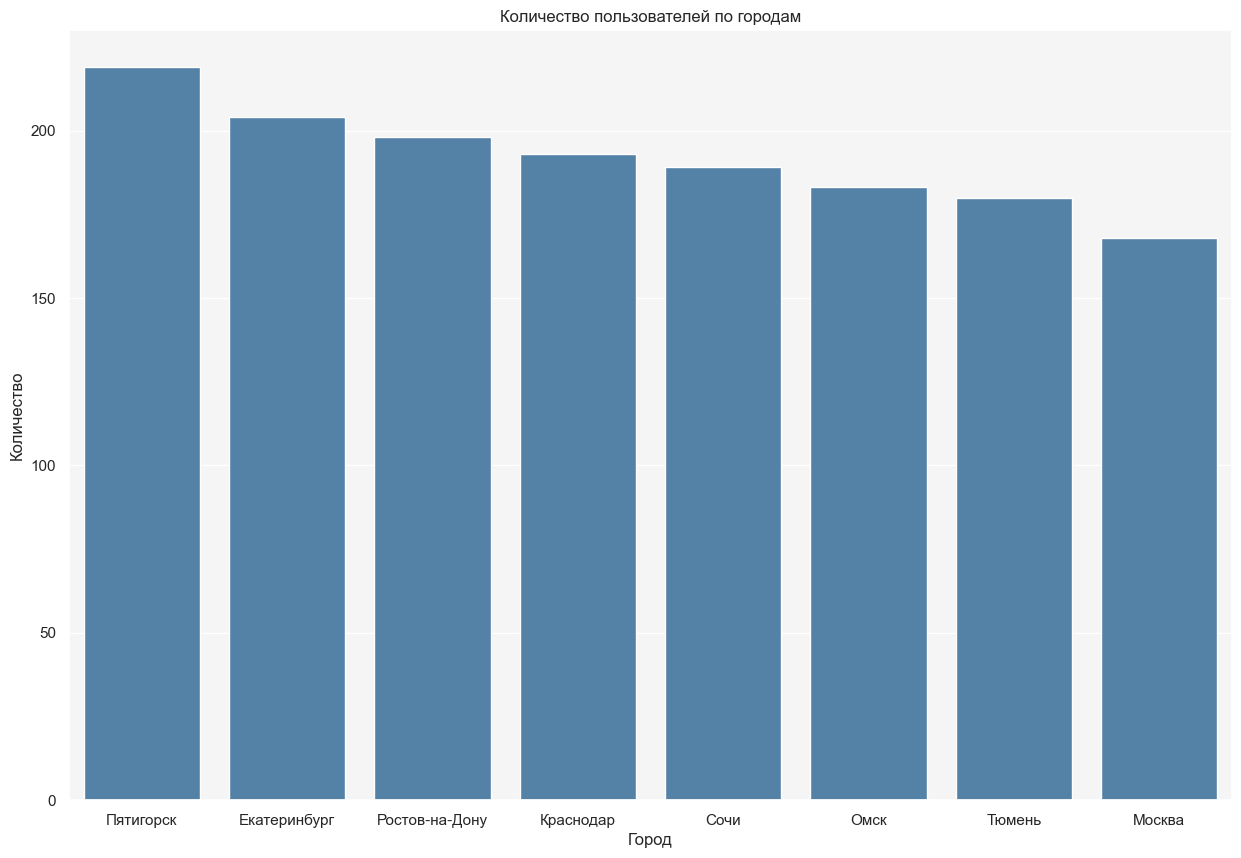

In [25]:
sns.barplot(data=users.groupby('city', as_index=False)['name'].count(), 
                x='city', y='name', order=users.groupby('city')['name']
                                               .count().sort_values(ascending=False).index, 
                color='#4682B4')


plt.xlabel('Город')
plt.ylabel('Количество')
plt.title('Количество пользователей по городам')

#### Вывод
Наиболее часто встречающемся городом является Пятигорск

### 3.2 соотношение пользователей с подпиской и без подписки

In [26]:
users_sub = users.pivot_table(
                              index='subscription_type',
                              values='user_id', aggfunc='count', margins=True)

In [27]:
users_sub['percent_of_total'] = users_sub['user_id'].apply(lambda x: x / users_sub['user_id'][2]*100)
users_sub

,user_id,percent_of_total
subscription_type,,
free,835,54.43
ultra,699,45.57
All,1534,100.00


Text(0, 0.5, '')

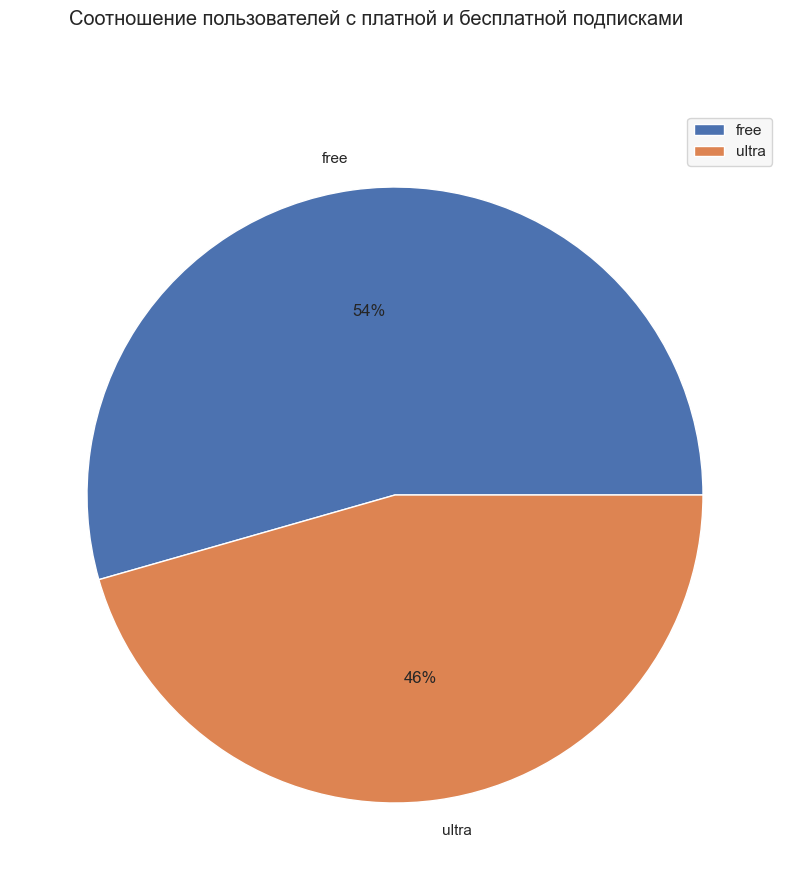

In [28]:
users.pivot_table(
    index='subscription_type',
    values='user_id',
    aggfunc='count').plot(kind='pie', subplots=True,
                          autopct='%1.0f%%', figsize=(15,10), 
                          title='Соотношение пользователей с платной и бесплатной подписками')
plt.ylabel('')

#### Вывод
Немного меньше половины пользователей используют платную подписку

### 3.3 Возраст пользователей

In [29]:
users.pivot_table(index='age',
                 values='user_id',
                  aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
age,
25,145
24,132
26,131
23,129
27,119
22,119
28,112
21,93
20,71


Text(0.5, 1.0, 'Количество пользователей по возрастам')

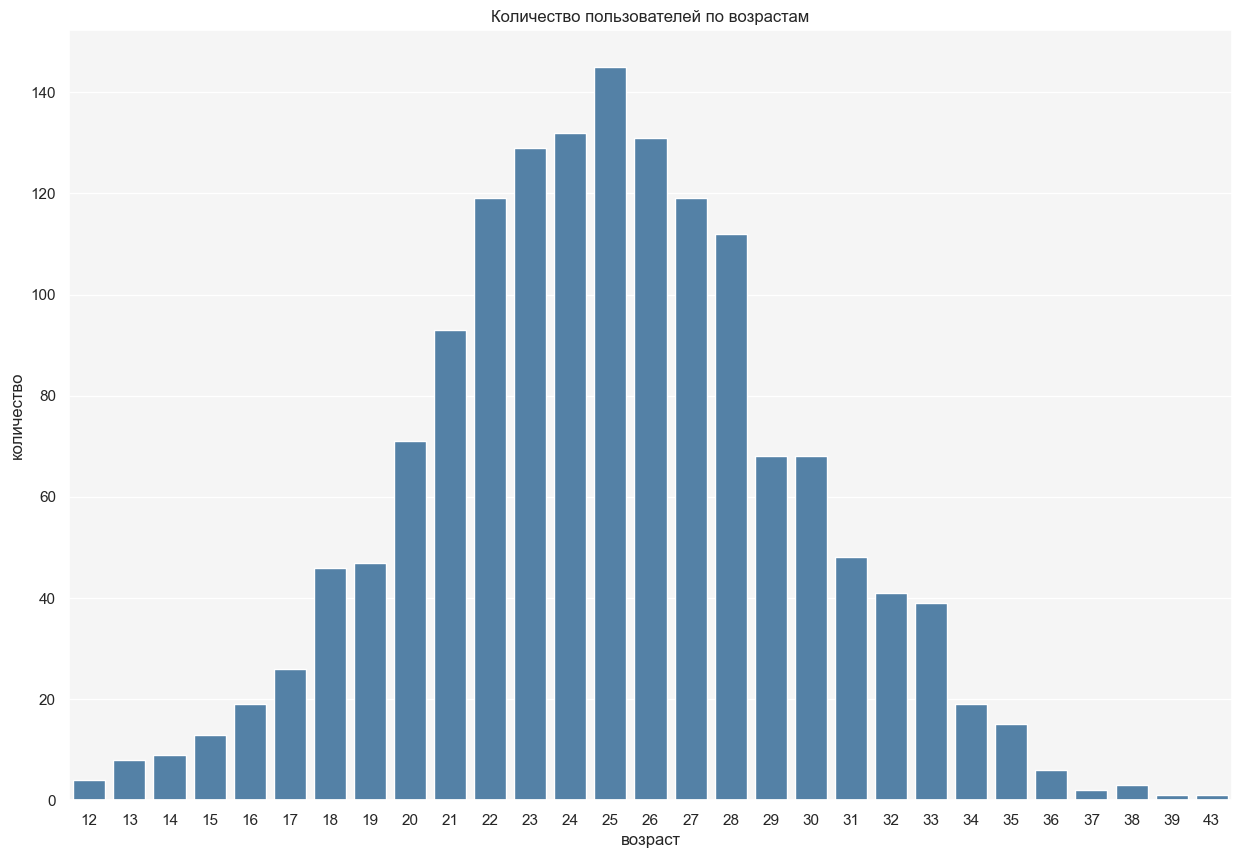

In [30]:
sns.countplot(data=users, x='age', color='#4682B4')
plt.xlabel('возраст')
plt.ylabel('количество')
plt.title('Количество пользователей по возрастам')

In [31]:
def age_group(age):
    """
    Функция категоризует пользователей по возрасту.
    12-18 лет - Подростки
    18-30 лет - Молодёж
    30 - ... - Взрослые
    """
    if age <= 18:
        return 'подростки'
    if age <= 30:
        return 'молодёж'
    if age > 30:
        return 'взрослые'

In [32]:
users['age_group'] = users['age'].apply(age_group)

In [33]:
#Остановился здесь

Text(0.5, 1.0, 'Количество пользователей по возрастным группам')

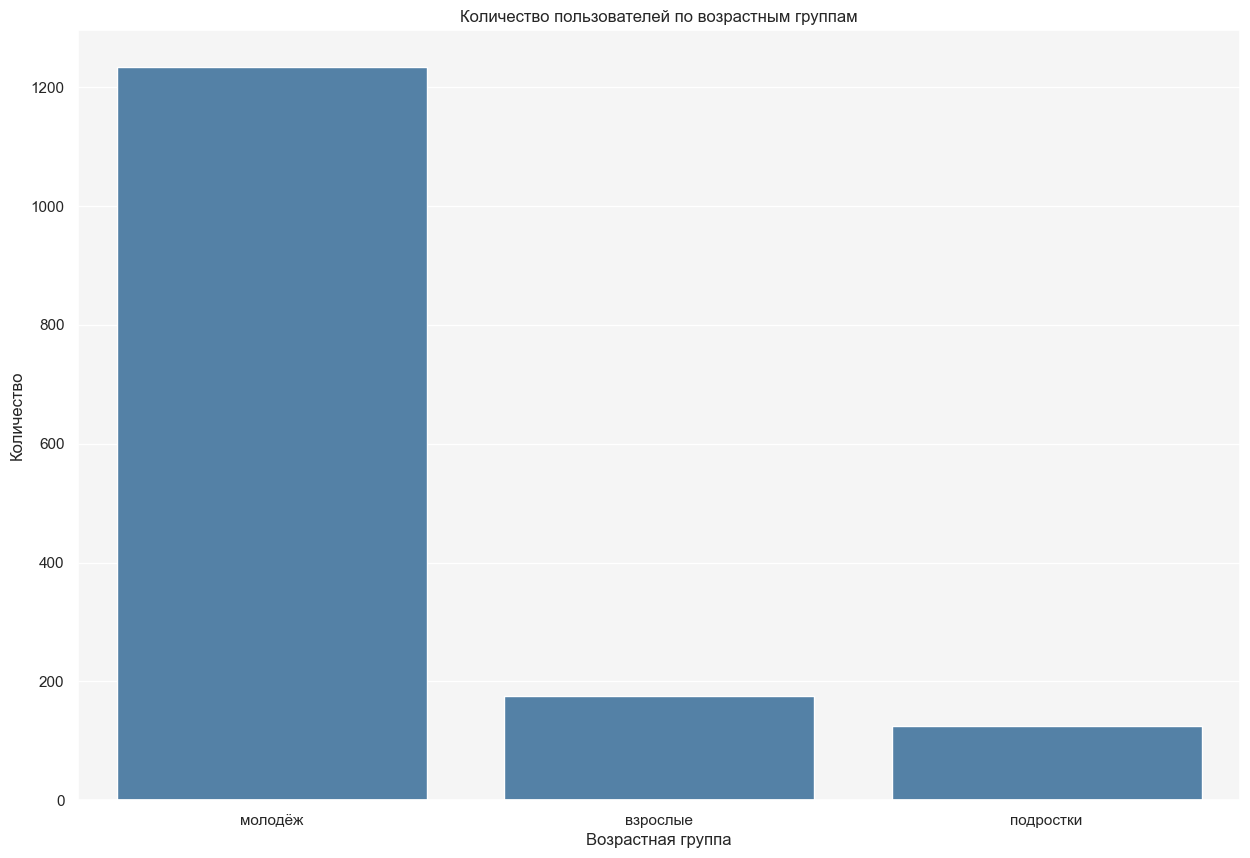

In [34]:
sns.countplot(data=users, x='age_group', color='#4682B4')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество')
plt.title('Количество пользователей по возрастным группам')

Text(0.5, 1.0, 'Количество пользователей по возрастам среди подростков')

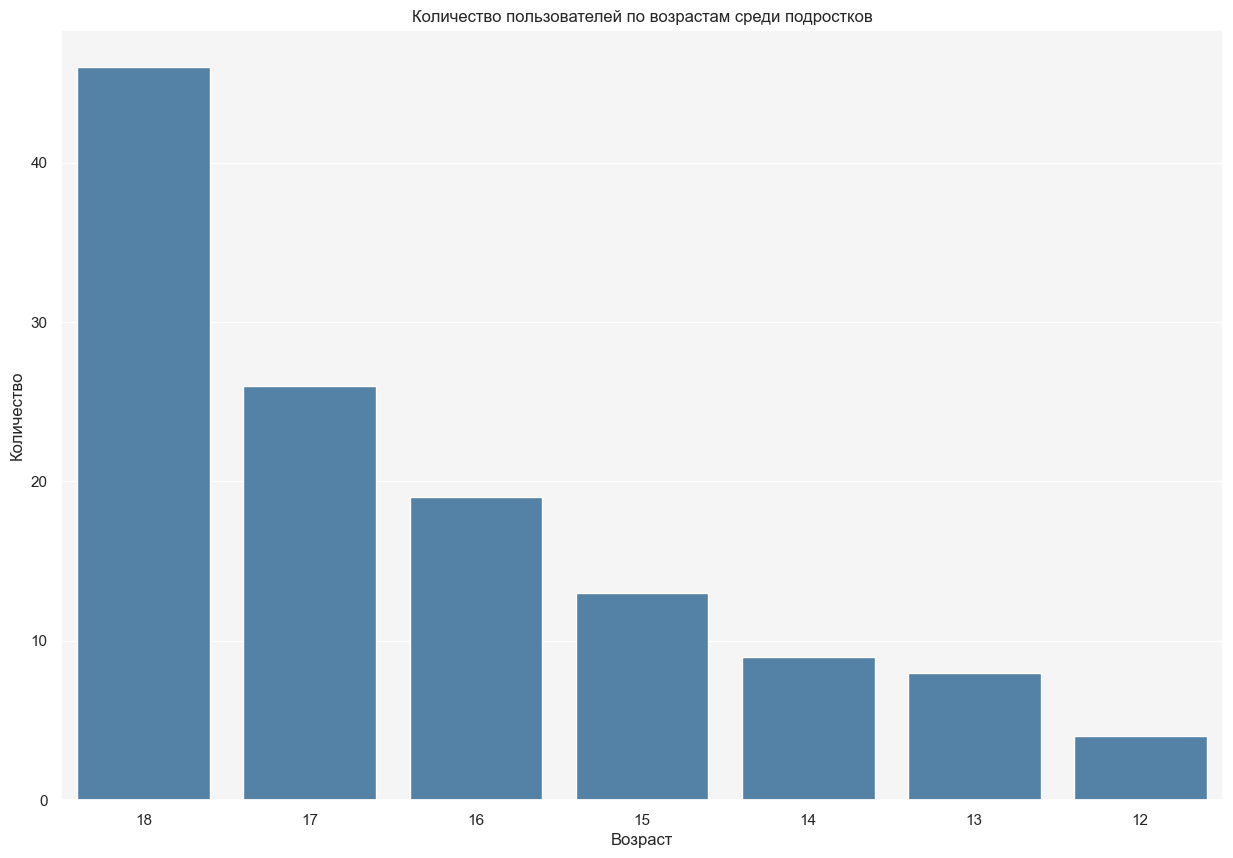

In [35]:
sns.countplot(data=users.query('age_group == "подростки"'), x='age', 
              color='#4682B4', order=users.query('age_group == "подростки"')
                                          .groupby('age')['user_id']
                                          .count().sort_values(ascending=False).index)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Количество пользователей по возрастам среди подростков')

Text(0.5, 1.0, 'Количество пользователей по возрастам среди молодёжи')

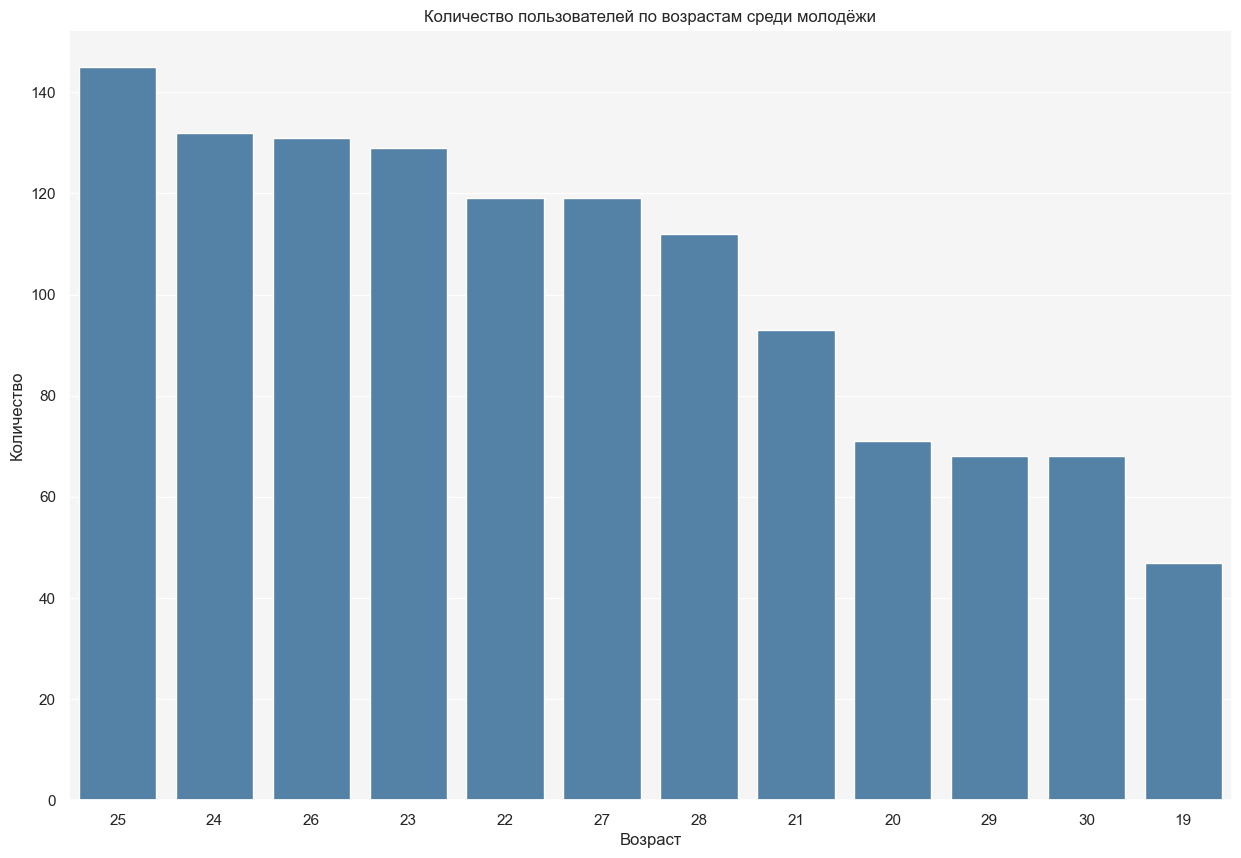

In [36]:
sns.countplot(data=users.query('age_group == "молодёж"'), x='age', 
              color='#4682B4', order=users.query('age_group == "молодёж"')
                                          .groupby('age')['user_id']
                                          .count().sort_values(ascending=False).index)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Количество пользователей по возрастам среди молодёжи')

Text(0.5, 1.0, 'Количество пользователей по возрастам среди взрослых')

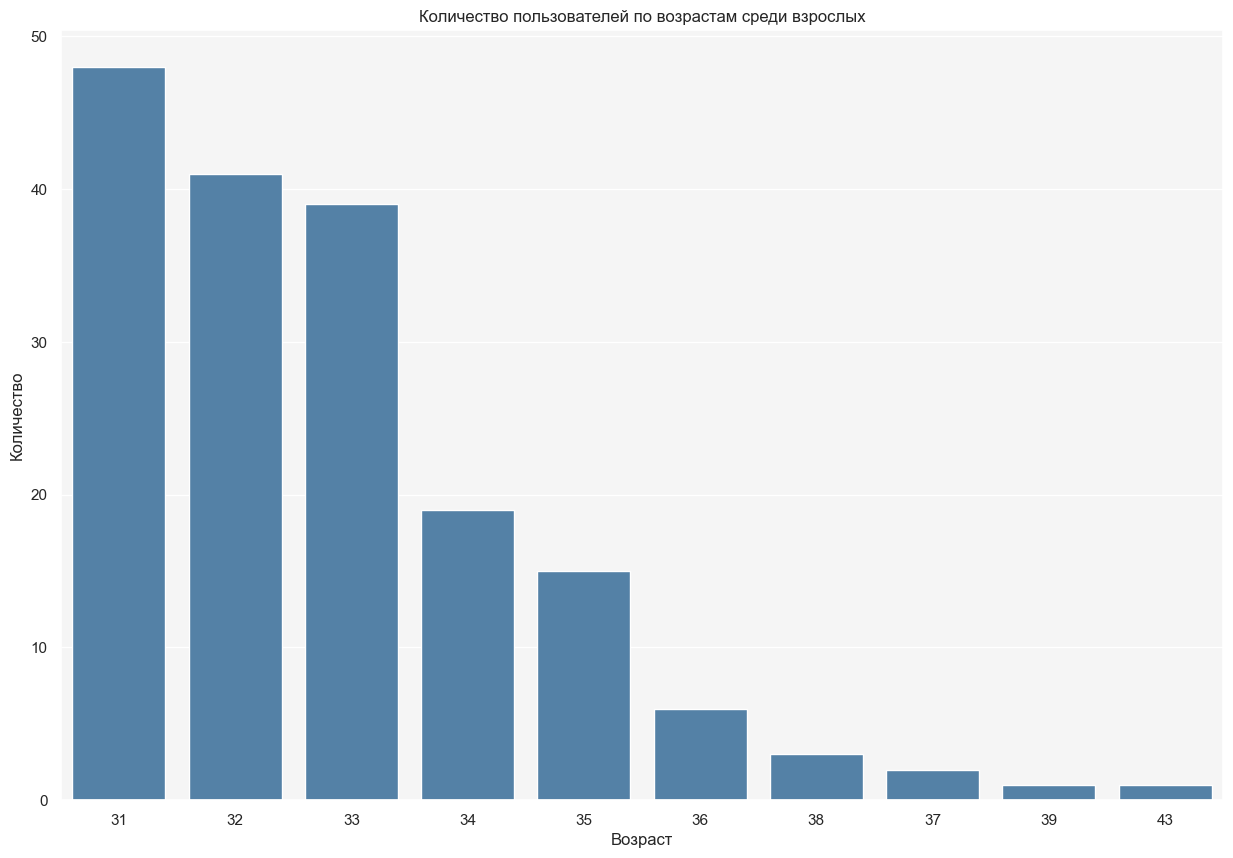

In [37]:
sns.countplot(data=users.query('age_group == "взрослые"'), x='age', 
              color='#4682B4', order=users.query('age_group == "взрослые"')
                                          .groupby('age')['user_id']
                                          .count().sort_values(ascending=False).index)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Количество пользователей по возрастам среди взрослых')

#### Вывод
Наиболее популярно приложение среди молодых людей от 18 до 30 лет. Пользователи 25 лет, чаще остальных пользуются сервисом.

### 3.4 Расстояние, которое пользователь преодолел за одну поездку

In [38]:
def distance_group(distance):
    """
    Функция категоризует расстояние поездок.
    0-2000 м - Короткие поездки
    2000-5000 м - Средние поездки
    5000 - ... - Длинные поездки
    """
    if distance <= 2000:
        return 'короткая'
    if distance <= 5000:
        return 'средняя'
    if distance > 5000:
        return 'длинная'

In [39]:
rides['distance_group'] = rides['distance'].apply(distance_group)

Text(0.5, 1.0, 'Количество поездок в зависимости от расстояния')

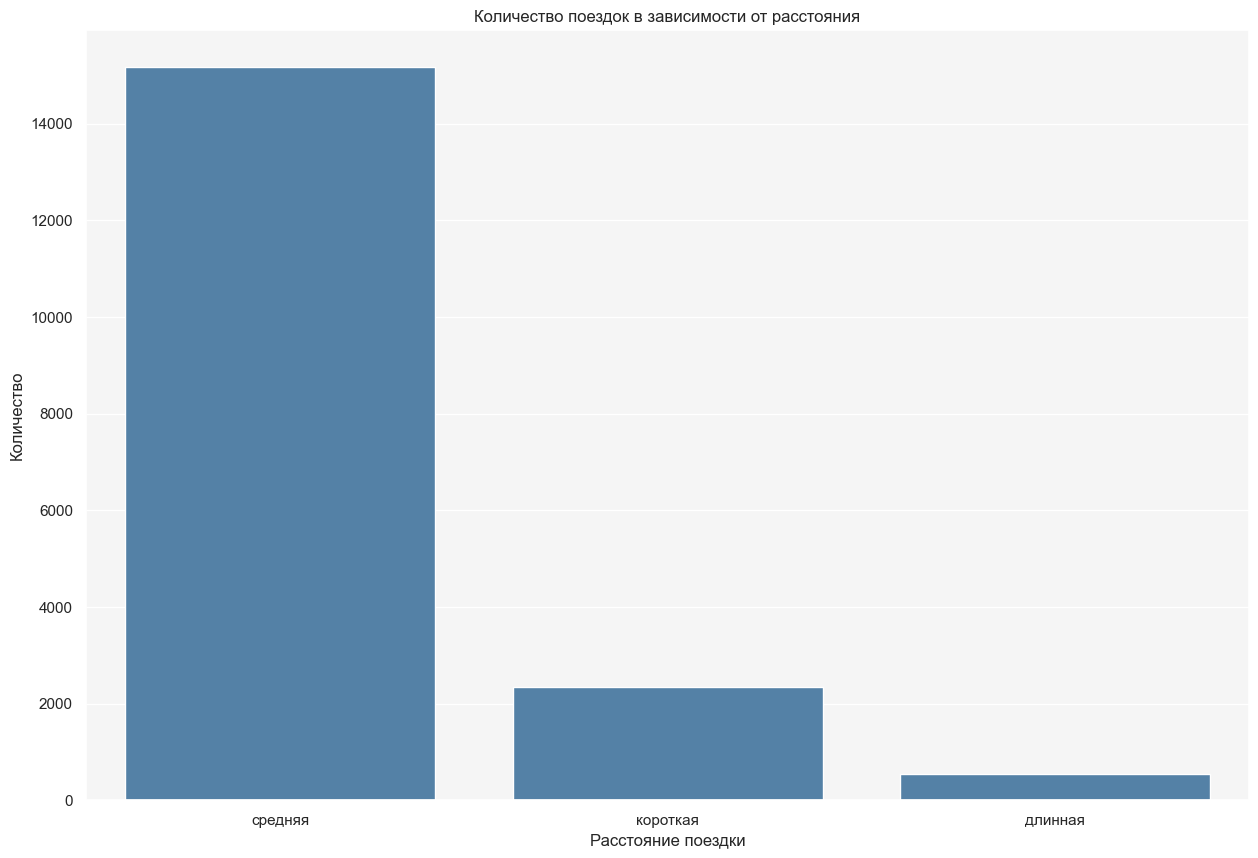

In [40]:
sns.countplot(data=rides, x='distance_group', color='#4682B4')
plt.xlabel('Расстояние поездки')
plt.ylabel('Количество')
plt.title('Количество поездок в зависимости от расстояния')

Text(0.5, 1.0, 'Гистограмма коротких поездок по расстоянию')

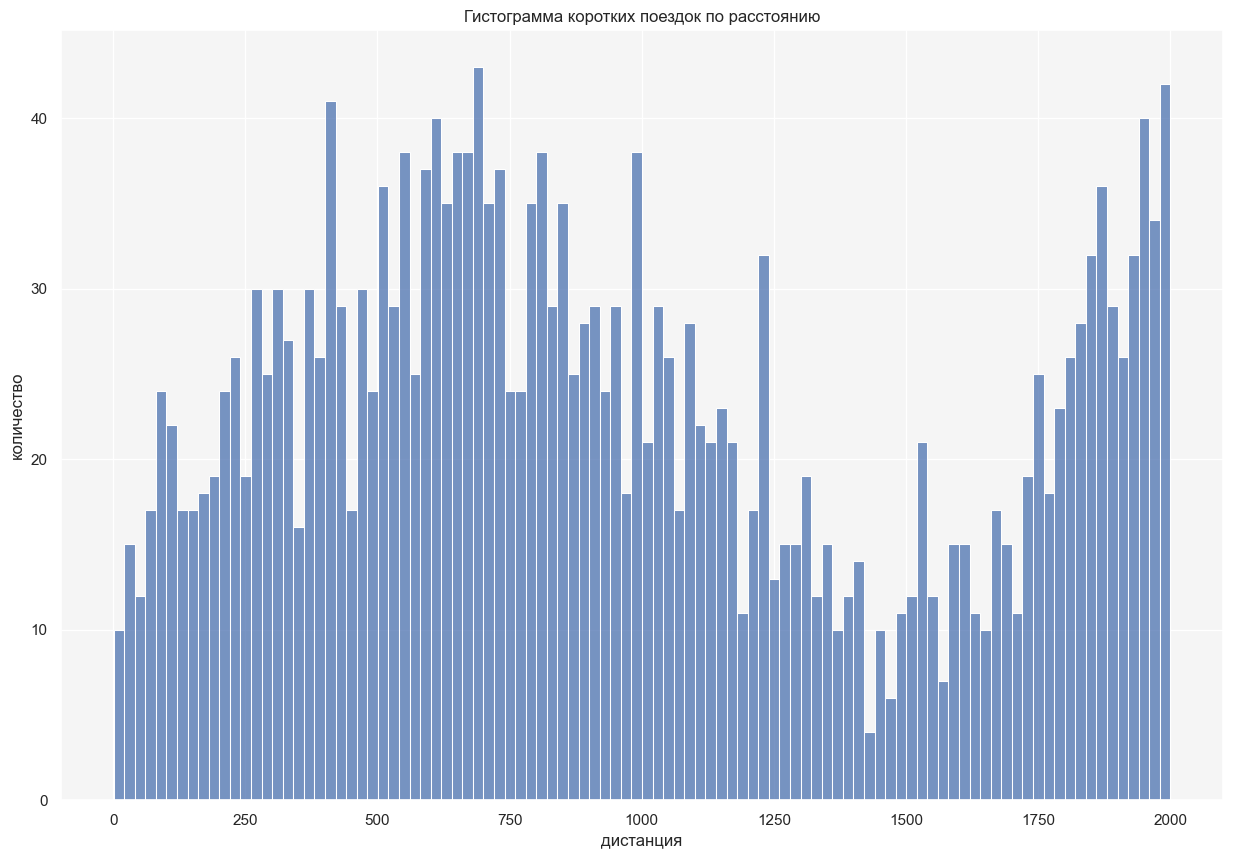

In [41]:
sns.histplot(data=rides.query('distance_group == "короткая"'), x='distance', bins=100)
plt.xlabel('дистанция')
plt.ylabel('количество')
plt.title('Гистограмма коротких поездок по расстоянию')

Text(0.5, 1.0, 'Гистограмма средних поездок по расстоянию')

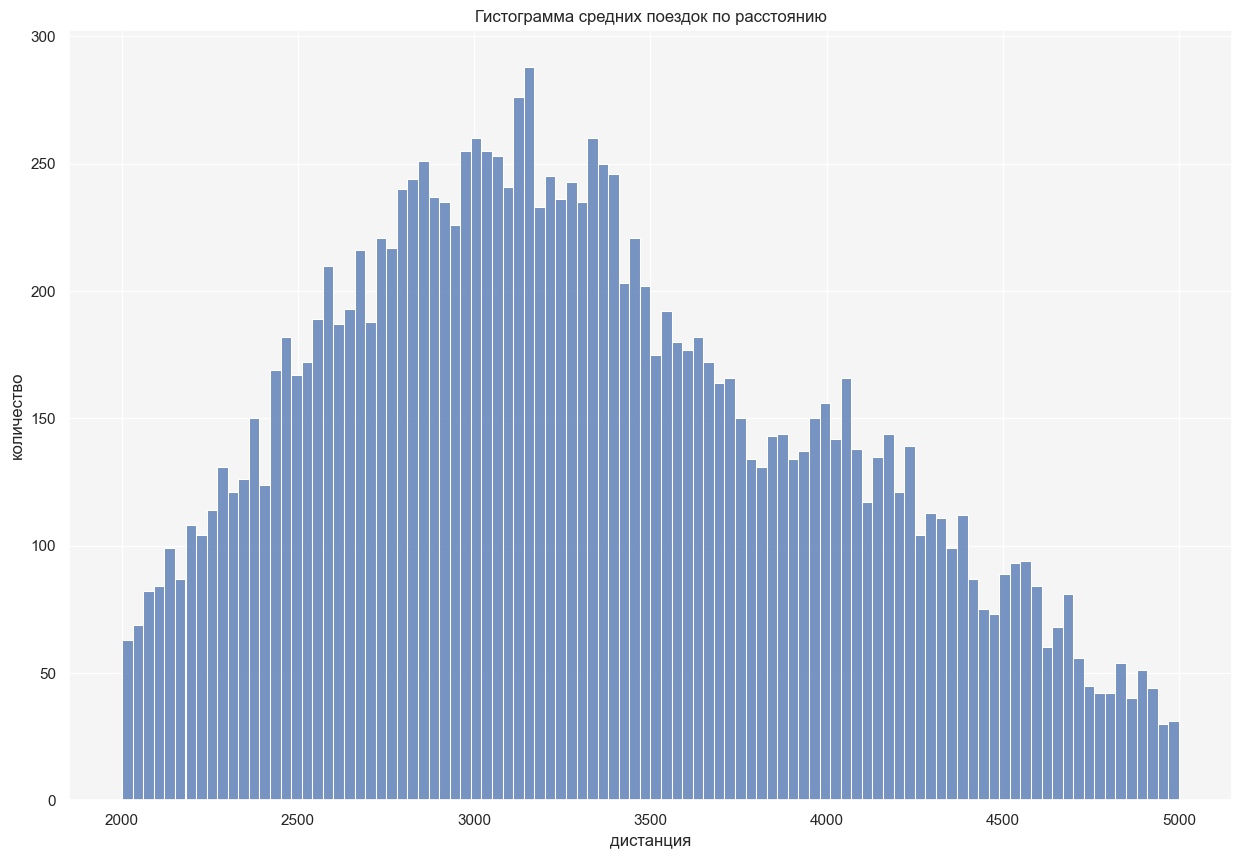

In [42]:
sns.histplot(data=rides.query('distance_group == "средняя"'), x='distance', bins=100)
plt.xlabel('дистанция')
plt.ylabel('количество')
plt.title('Гистограмма средних поездок по расстоянию')

Text(0.5, 1.0, 'Гистограмма длинных поездок по расстоянию')

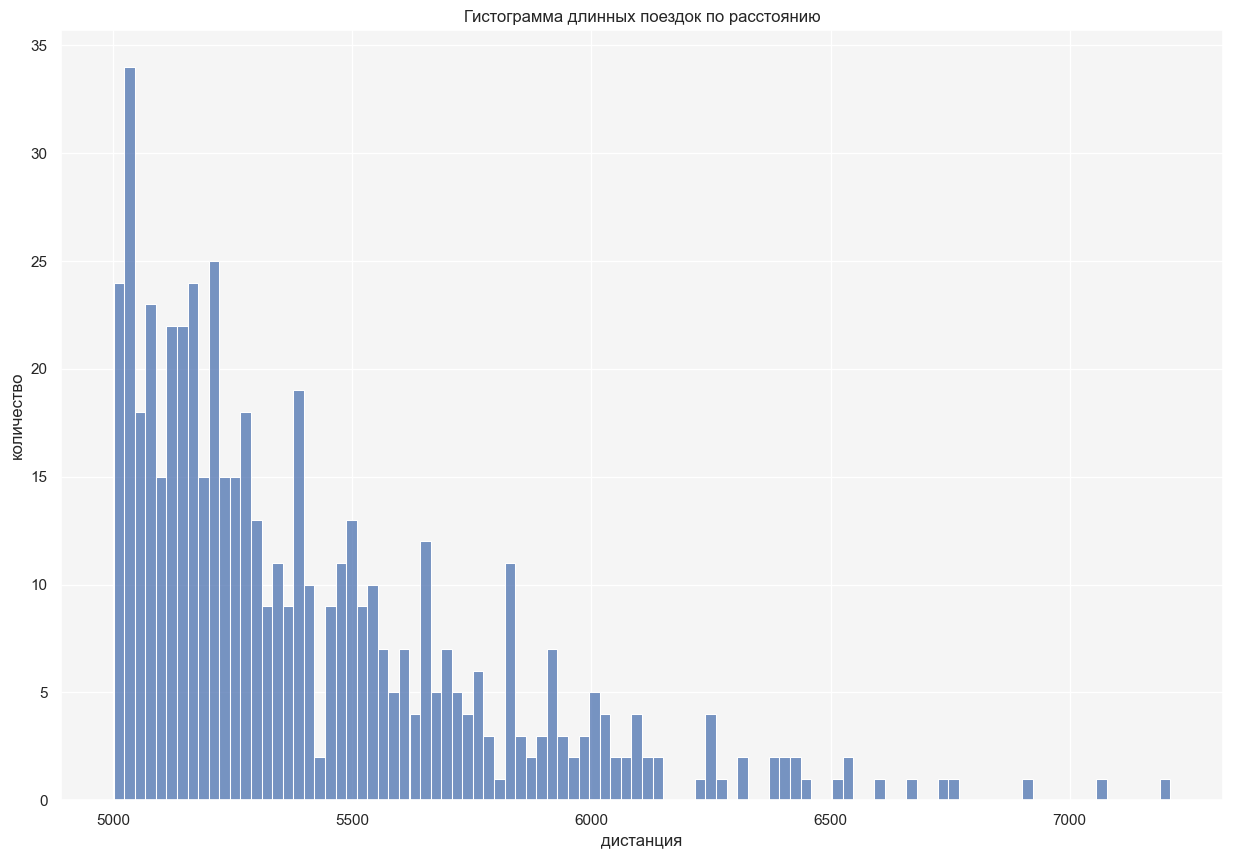

In [43]:
sns.histplot(data=rides.query('distance_group == "длинная"'), x='distance', bins=100)
plt.xlabel('дистанция')
plt.ylabel('количество')
plt.title('Гистограмма длинных поездок по расстоянию')

#### Вывод 
Самыми популярными являются поездки длинной 2-5 км 

### 3.5 Продолжительность поездок

In [44]:
rides['duration'].sort_values()

12013    0.50
17314    0.50
15029    0.50
7437     0.50
12967    0.50
         ... 
6453    38.27
1998    38.35
2623    39.53
4709    39.87
4215    40.82
Name: duration, Length: 18068, dtype: float64

In [45]:
rides.loc[rides['duration'] == 0.5]

,user_id,distance,duration,date,month,distance_group
6531,701,4196.45,0.50,2021-08-31,8,средняя
6570,704,4830.82,0.50,2021-10-14,10,средняя
6680,712,4684.00,0.50,2021-03-04,3,средняя
6695,713,5215.64,0.50,2021-02-25,2,длинная
6768,718,5197.44,0.50,2021-02-11,2,длинная
...,...,...,...,...,...,...
17004,1460,5531.34,0.50,2021-01-19,1,длинная
17242,1477,6724.93,0.50,2021-01-12,1,длинная
17314,1483,4445.48,0.50,2021-03-06,3,средняя
17505,1496,5722.55,0.50,2021-02-14,2,длинная


In [46]:
rides['duration'].describe()

count   18068.00
mean       17.81
std         6.09
min         0.50
25%        13.60
50%        17.68
75%        21.72
max        40.82
Name: duration, dtype: float64

Text(0.5, 1.0, 'Количество поездок в зависимости от их длительности')

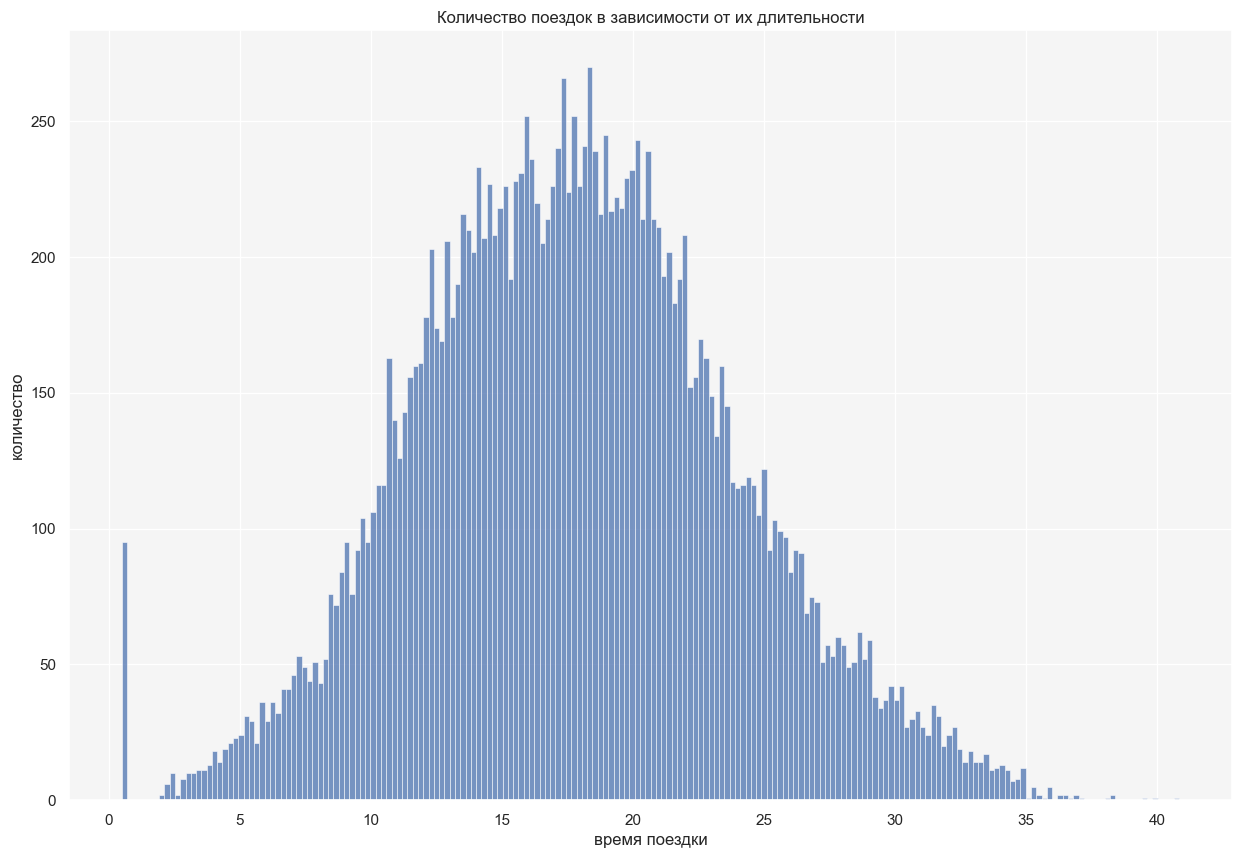

In [47]:
sns.histplot(data=rides, x='duration', bins=200)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Количество поездок в зависимости от их длительности')

Text(0.5, 1.0, 'Диаграмма размаха времени поездок')

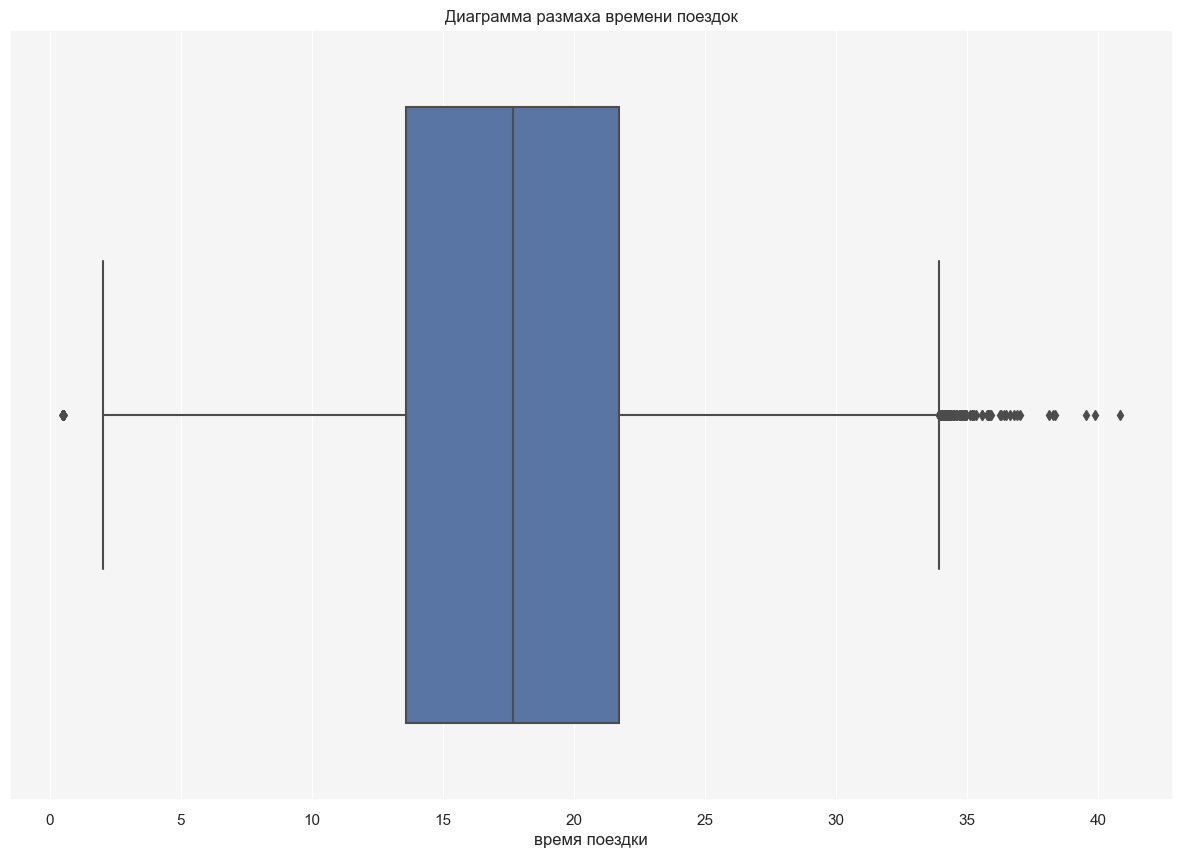

In [48]:
sns.boxplot(data=rides, x='duration')
plt.xlabel('время поездки')
plt.title('Диаграмма размаха времени поездок')

Есть много поездок с ненормальными значениями по времени, заменю их на медиану в зависимости от километража поездки

In [49]:
for a in rides['distance_group'].unique():
    rides.loc[(rides['distance_group'] == a) & (rides['duration'] == 0.5), 'duration'] = \
    rides.loc[rides['distance_group'] == a, 'duration'].median()

In [50]:
rides.loc[rides['duration'] == 0.5]

,user_id,distance,duration,date,month,distance_group


In [51]:
rides['duration'].describe()

count   18068.00
mean       17.91
std         5.97
min         2.04
25%        13.70
50%        17.75
75%        21.77
max        40.82
Name: duration, dtype: float64

In [52]:
def duration_group(duration):
    """
    Функция категоризует поездки по времени.
    0-10 мин - Короткие поездки
    10-25 мин - Средние поездки
    25 - ... - Долгие поездки
    """
    if duration <= 10:
        return 'короткая'
    if duration <= 25:
        return 'средняя'
    if duration > 25:
        return 'долгая'

In [53]:
rides['duration_group'] = rides['duration'].apply(duration_group)

In [54]:
rides.loc[rides['distance_group'] != rides['duration_group']].sample(5)

,user_id,distance,duration,date,month,distance_group,duration_group
11236,1047,5287.83,14.20,2021-02-08,2,длинная,средняя
9176,899,4612.22,25.45,2021-09-27,9,средняя,долгая
10082,963,949.45,17.75,2021-10-08,10,короткая,средняя
11425,1060,2456.75,8.91,2021-08-09,8,средняя,короткая
10489,991,4174.02,26.73,2021-12-27,12,средняя,долгая


In [55]:
rides.groupby('duration_group')['user_id'].count().sort_values(ascending=False).index

Index(['средняя', 'долгая', 'короткая'], dtype='object', name='duration_group')

Text(0.5, 1.0, 'Количество поездок в зависимости от продолжительности')

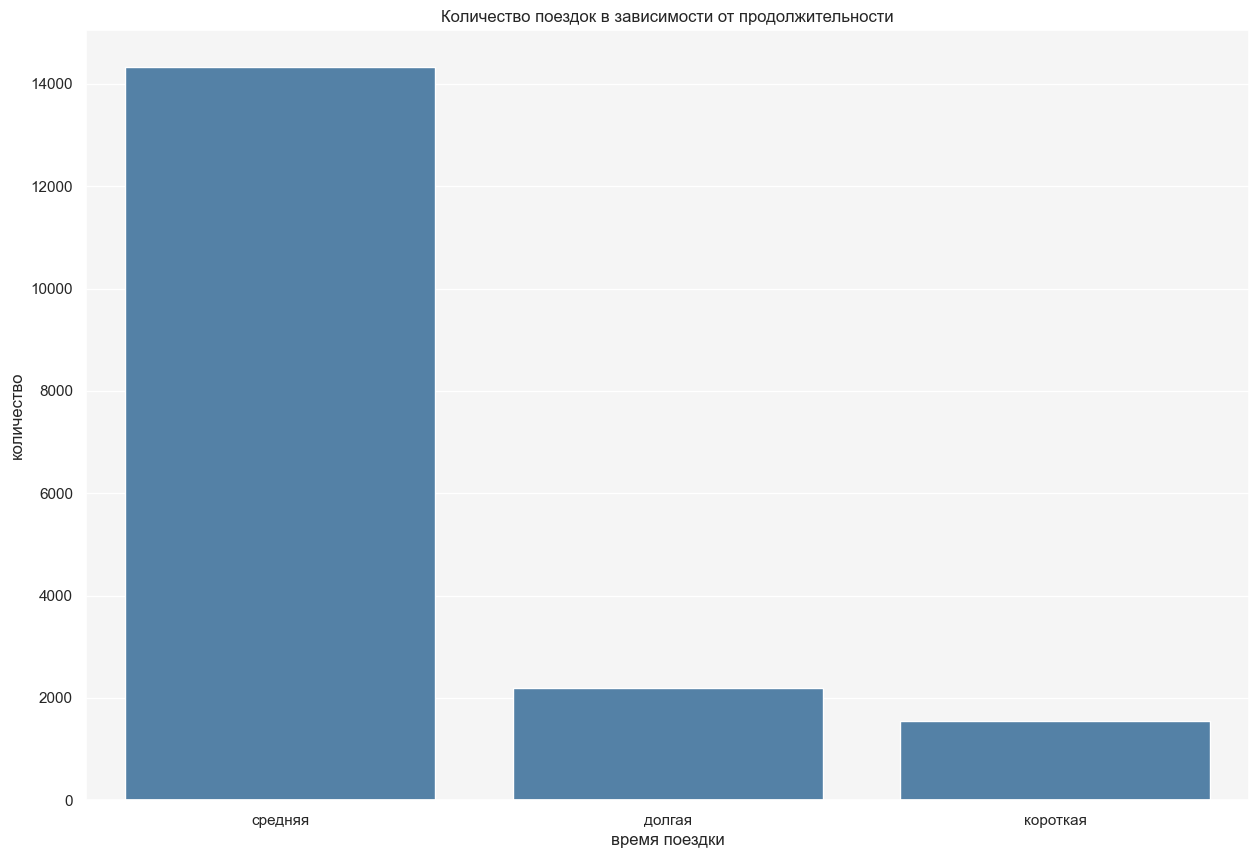

In [56]:
sns.countplot(data=rides, x='duration_group', color='#4682B4',
             order=rides.groupby('duration_group')['user_id']
                        .count().sort_values(ascending=False).index)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Количество поездок в зависимости от продолжительности')

Text(0.5, 1.0, 'Частота коротких по времени поездок')

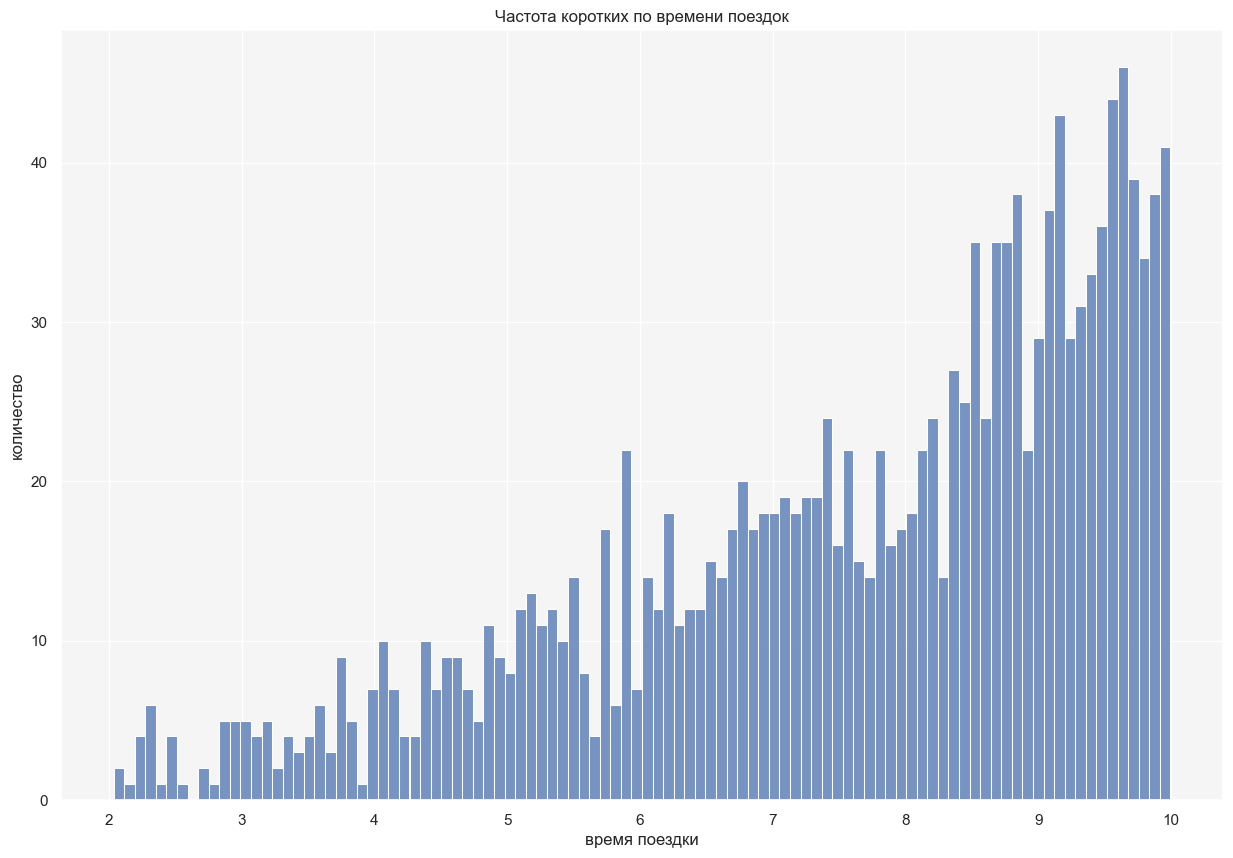

In [57]:
sns.histplot(data=rides.query('duration_group == "короткая"'), x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота коротких по времени поездок')

Text(0.5, 1.0, 'Частота средних по времени поездок')

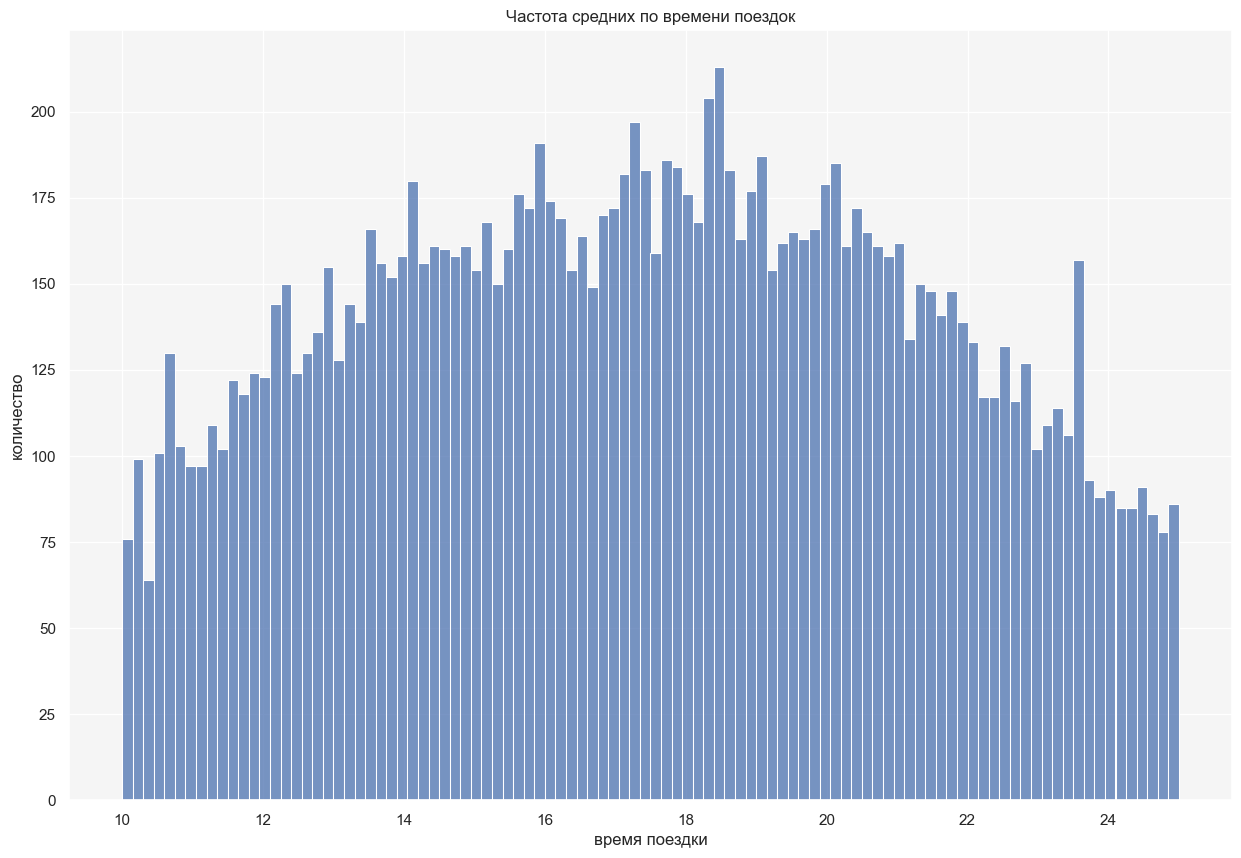

In [58]:
sns.histplot(data=rides.query('duration_group == "средняя"'), x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота средних по времени поездок')

Text(0.5, 1.0, 'Частота долгих по времени поездок')

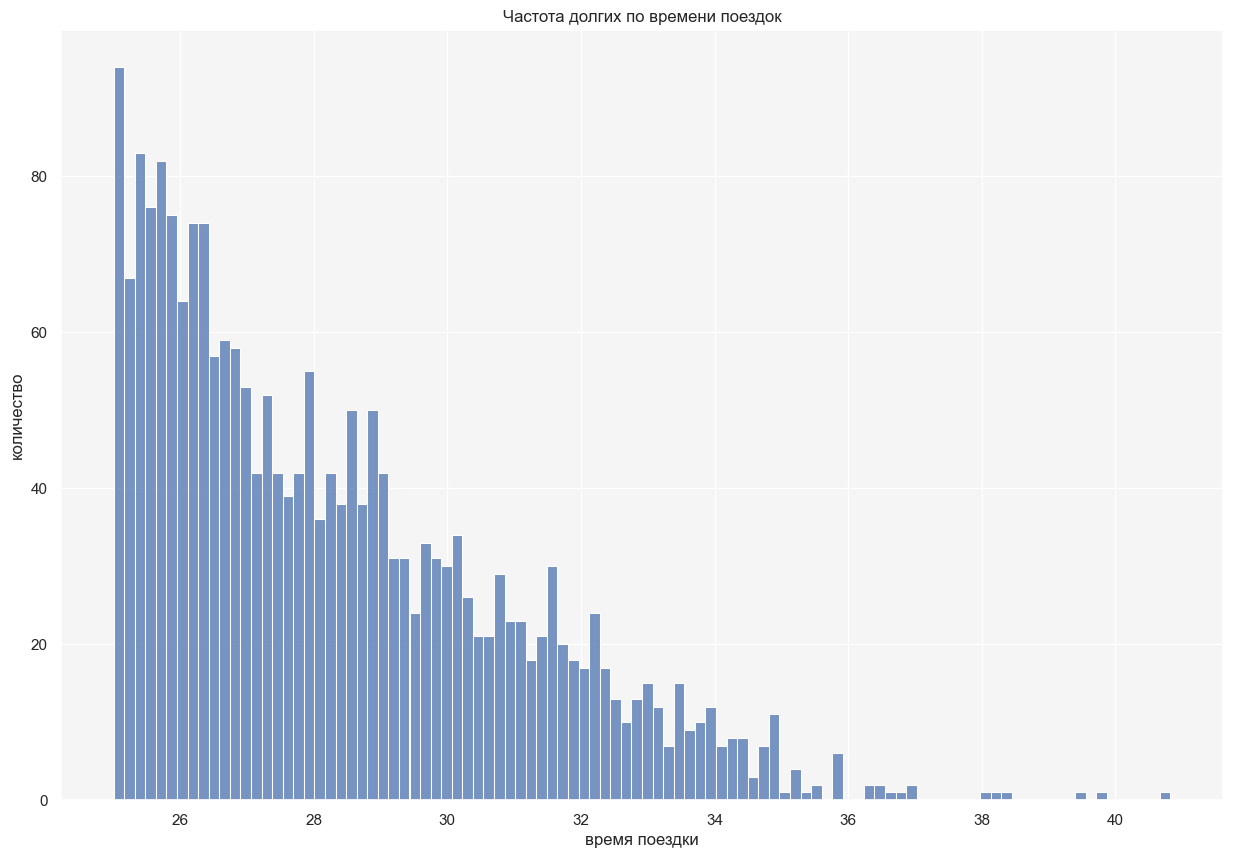

In [59]:
sns.histplot(data=rides.query('duration_group == "долгая"'), x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота долгих по времени поездок')

#### Вывод
Наиболее часто поездки занимают 10-25 мин

## Шаг 4. Объединение данных

### 4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [60]:
users.shape

(1534, 6)

In [61]:
rides.shape

(18068, 7)

In [62]:
subscriptions.shape

(2, 4)

In [63]:
data_1 = users.merge(rides, on='user_id', how='left')

In [64]:
data = data_1.merge(subscriptions, on='subscription_type', how='left')

In [65]:
data = data[['user_id', 'name', 'age', 'city', 'age_group', 'distance', 'distance_group',
    'duration', 'duration_group', 'date', 'month', 'subscription_type', 
     'minute_price', 'start_ride_price', 'subscription_fee']]

In [66]:
data.shape

(18068, 15)

#### Вывод
В полученном датафрейме 18068 строк и 15 столбцов, так как я объединил фреймы по столбцу 'user_id'

In [67]:
data.head()

,user_id,name,age,city,age_group,distance,distance_group,duration,duration_group,date,month,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,молодёж,4409.92,средняя,25.60,долгая,2021-01-01,1,ultra,6,0,199
1,1,Кира,22,Тюмень,молодёж,2617.59,средняя,15.82,средняя,2021-01-18,1,ultra,6,0,199
2,1,Кира,22,Тюмень,молодёж,754.16,короткая,6.23,короткая,2021-04-20,4,ultra,6,0,199
3,1,Кира,22,Тюмень,молодёж,2694.78,средняя,18.51,средняя,2021-08-11,8,ultra,6,0,199
4,1,Кира,22,Тюмень,молодёж,4028.69,средняя,26.27,долгая,2021-08-28,8,ultra,6,0,199


### 4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:

* c данными о пользователях без подписки

In [68]:
subscription_free = data.query('subscription_type == "free"')

* с данными о пользователях с подпиской

In [69]:
subscription_ultra = data.query('subscription_type == "ultra"')

### 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Расстояние поездок

* __Пользователи без подписки__

In [70]:
subscription_free['distance'].describe()

count   11568.00
mean     3045.50
std      1246.17
min         0.86
25%      2366.56
50%      3114.65
75%      3905.70
max      7211.01
Name: distance, dtype: float64

Text(0.5, 1.0, 'Количество поездок пользователей без подписки в зависимости от расстояния')

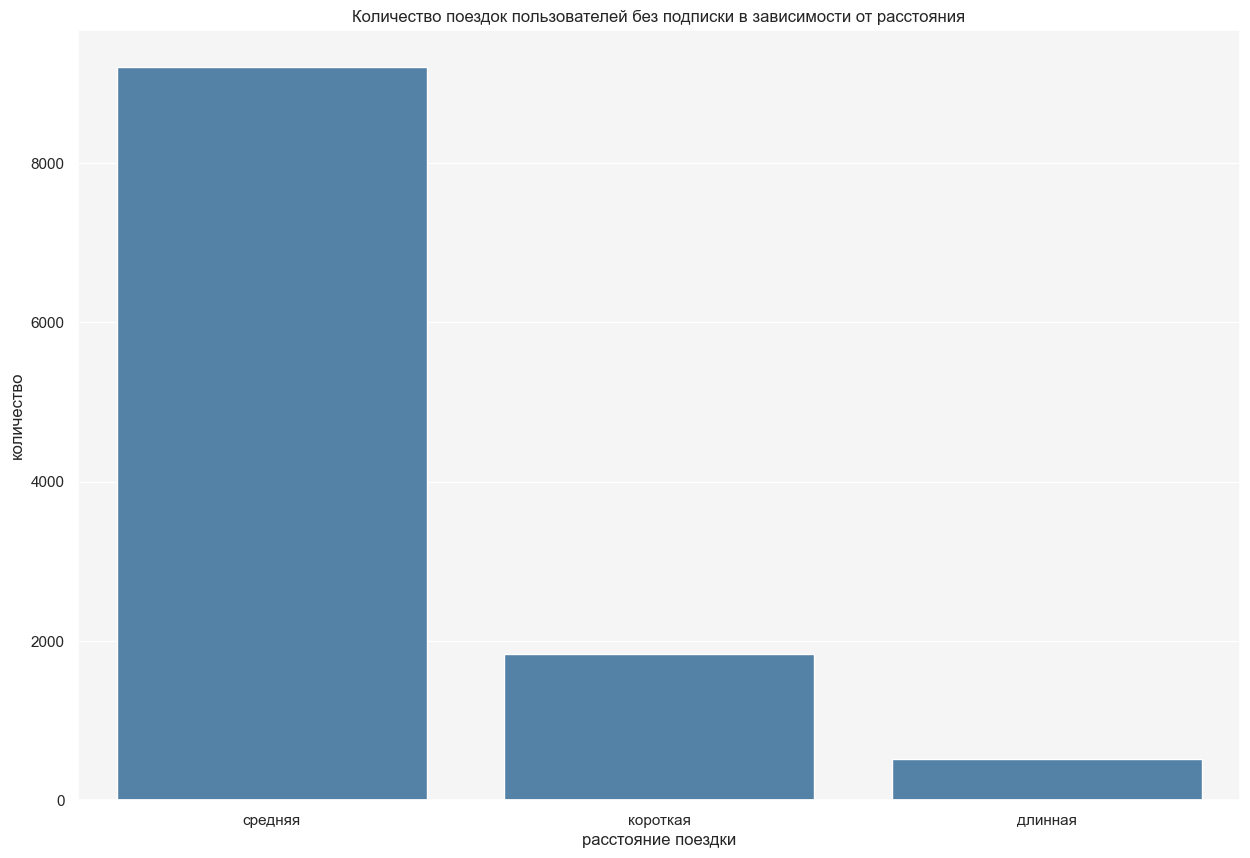

In [71]:
sns.countplot(data=subscription_free, x='distance_group', color='#4682B4')
plt.xlabel('расстояние поездки')
plt.ylabel('количество')
plt.title('Количество поездок пользователей без подписки в зависимости от расстояния')

Text(0.5, 1.0, 'Диаграмма размаха расстояния поездок')

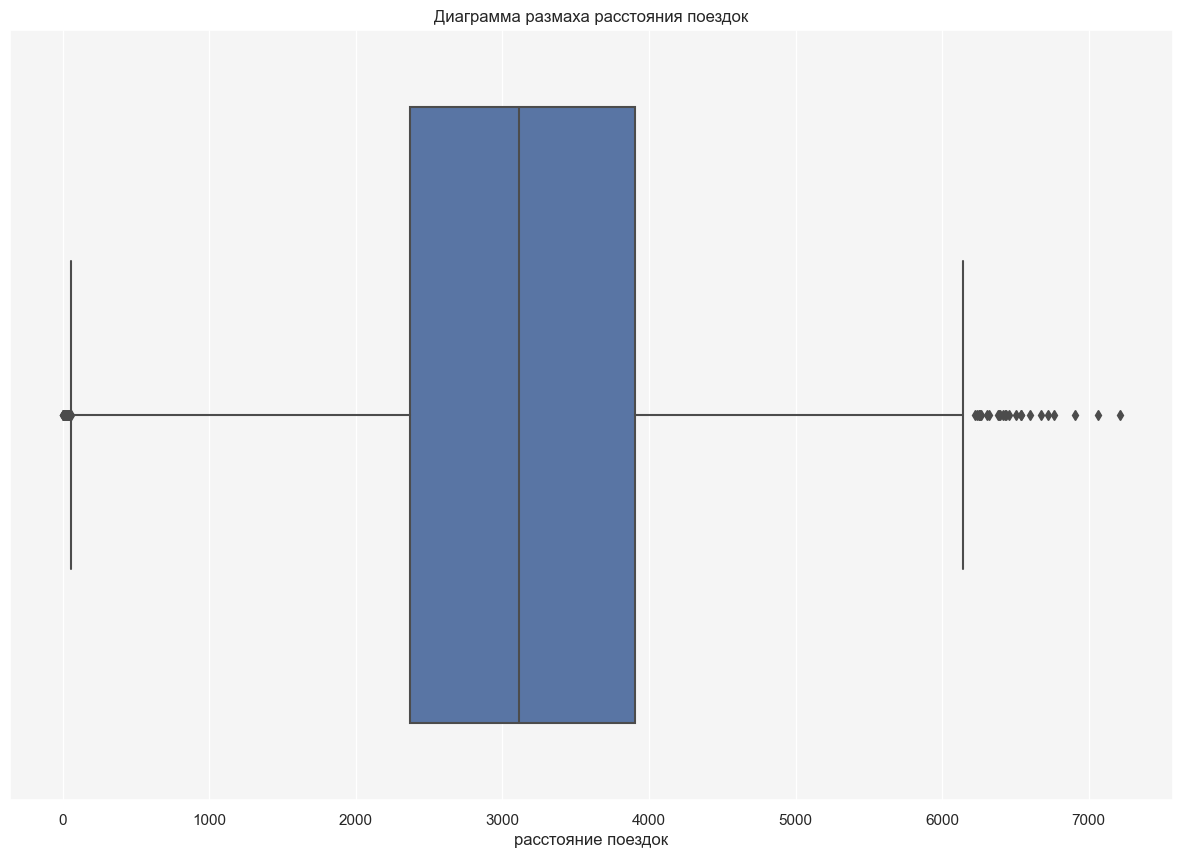

In [72]:
sns.boxplot(data=subscription_free, x='distance')
plt.xlabel('расстояние поездок')
plt.title('Диаграмма размаха расстояния поездок')

Text(0.5, 1.0, 'Частота поездок в зависимости от расстояния')

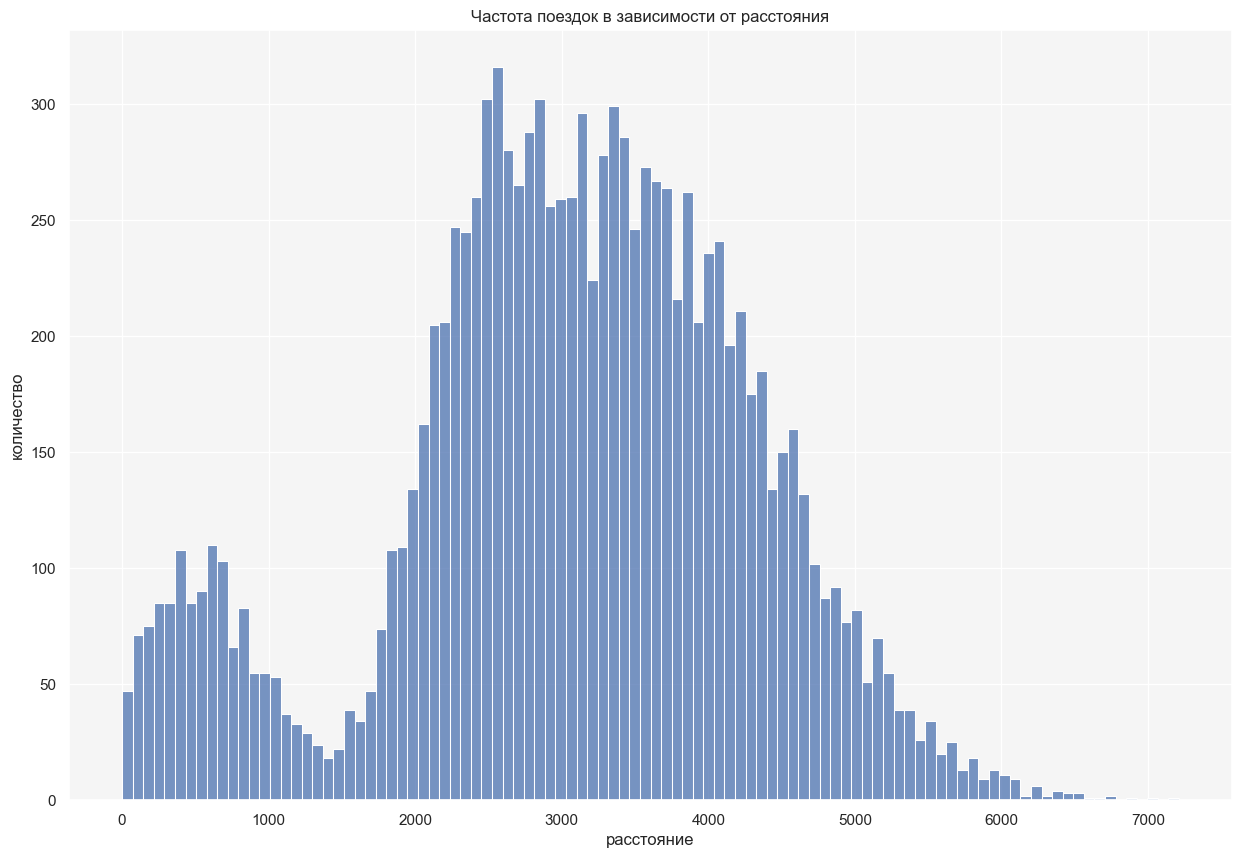

In [73]:
sns.histplot(data=subscription_free, x='distance', bins=100)
plt.xlabel('расстояние')
plt.ylabel('количество')
plt.title('Частота поездок в зависимости от расстояния')

* короткие поездки

Text(0.5, 1.0, 'Частота коротких поездок в зависимости от расстоянию')

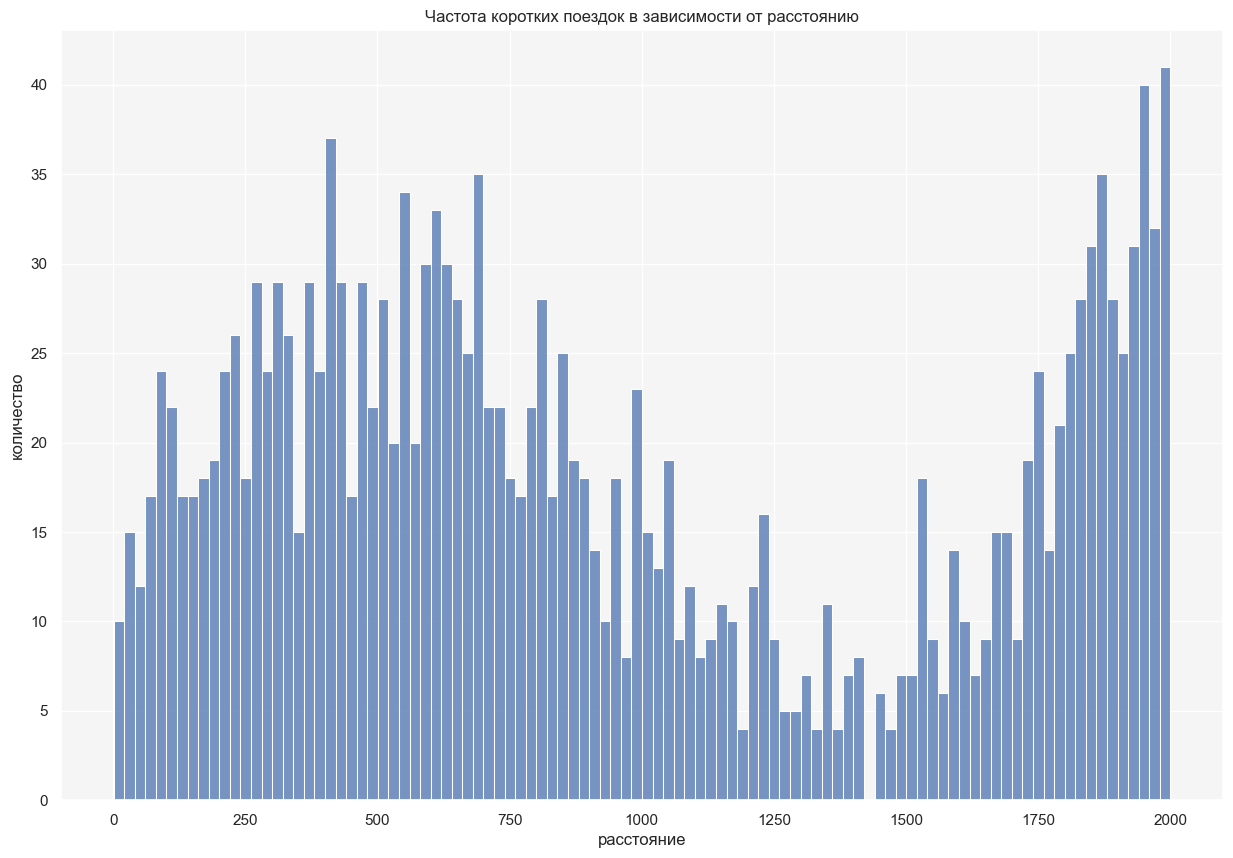

In [74]:
sns.histplot(data=subscription_free.query('distance_group == "короткая"'), x='distance', bins=100)
plt.xlabel('расстояние')
plt.ylabel('количество')
plt.title('Частота коротких поездок в зависимости от расстоянию')

* средние поездки

Text(0.5, 1.0, 'Частота средних поездок в зависимости от расстоянию')

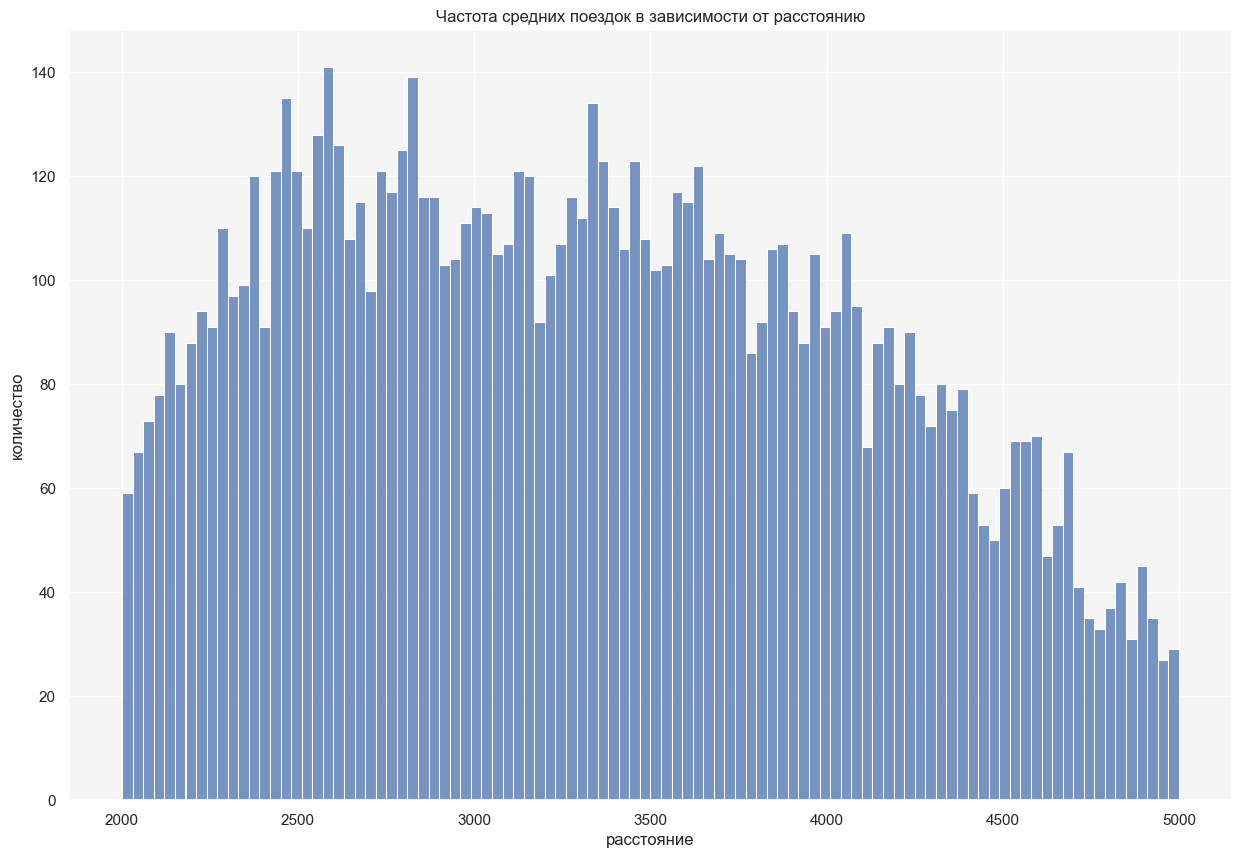

In [75]:
sns.histplot(data=subscription_free.query('distance_group == "средняя"'), x='distance', bins=100)
plt.xlabel('расстояние')
plt.ylabel('количество')
plt.title('Частота средних поездок в зависимости от расстоянию')

* длинные поездки

Text(0.5, 1.0, 'Частота длинных поездок в зависимости от расстоянию')

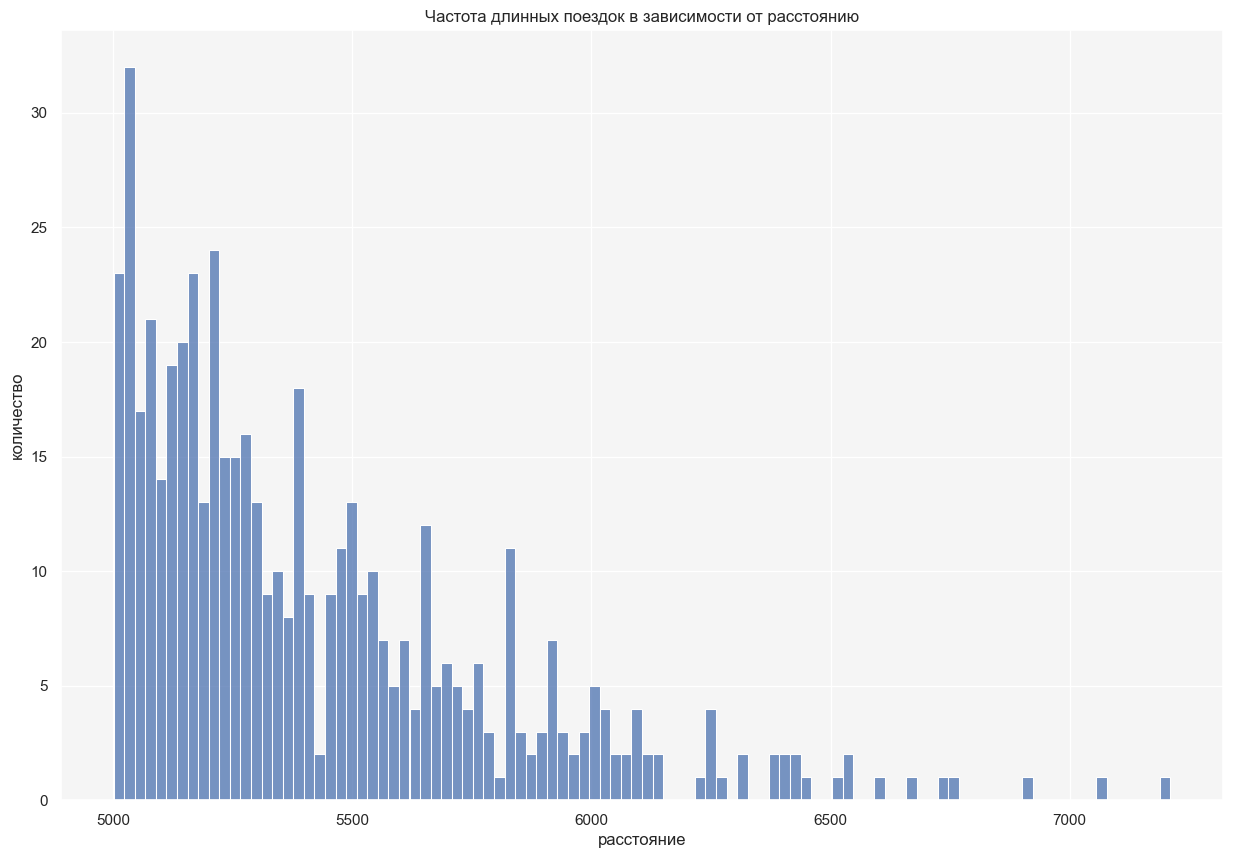

In [76]:
sns.histplot(data=subscription_free.query('distance_group == "длинная"'), x='distance', bins=100)
plt.xlabel('расстояние')
plt.ylabel('количество')
plt.title('Частота длинных поездок в зависимости от расстоянию')

#### Вывод
Пользователи без подписки чаще всего проезжают более 2.5 - 4 км

* __Пользователи с подпиской__

Text(0.5, 1.0, 'Количество поездок пользователей c подпиской в зависимости от продолжительности')

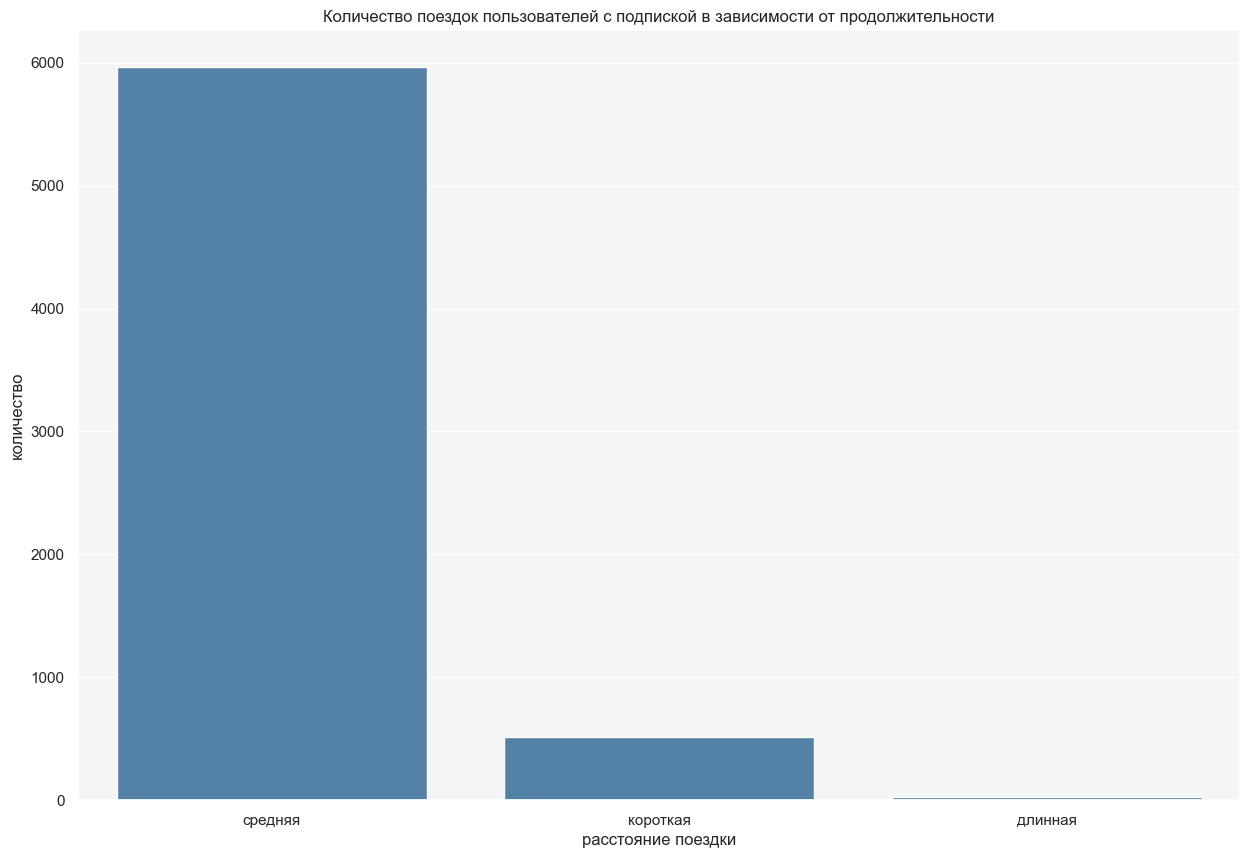

In [77]:
sns.countplot(data=subscription_ultra, x='distance_group', color='#4682B4')
plt.xlabel('расстояние поездки')
plt.ylabel('количество')
plt.title('Количество поездок пользователей c подпиской в зависимости от продолжительности')

Text(0.5, 1.0, 'Частота поездок пользователей с подпиской в зависимости от расстояния')

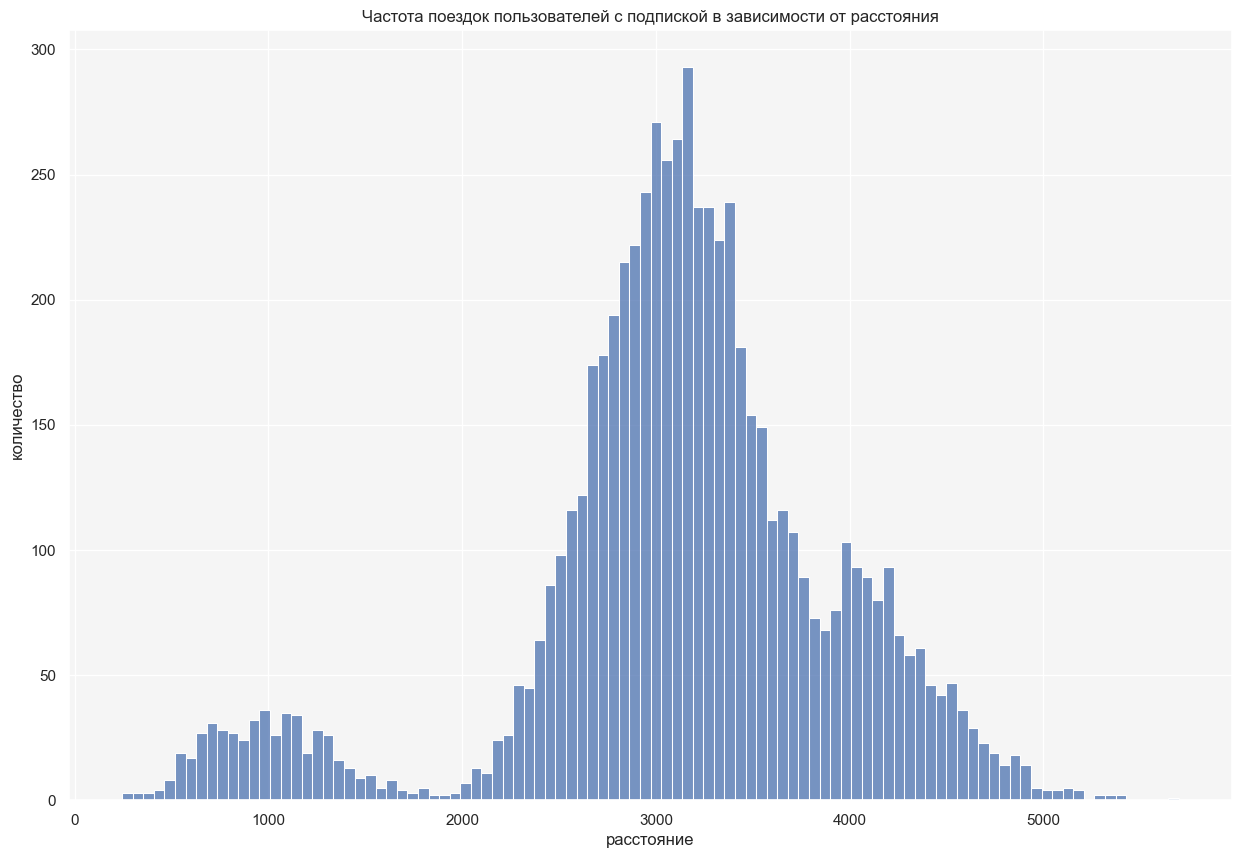

In [78]:
sns.histplot(data=subscription_ultra, x='distance', bins=100)
plt.xlabel('расстояние')
plt.ylabel('количество')
plt.title('Частота поездок пользователей с подпиской в зависимости от расстояния')

Text(0.5, 1.0, 'Диаграмма размаха расстояния поездок')

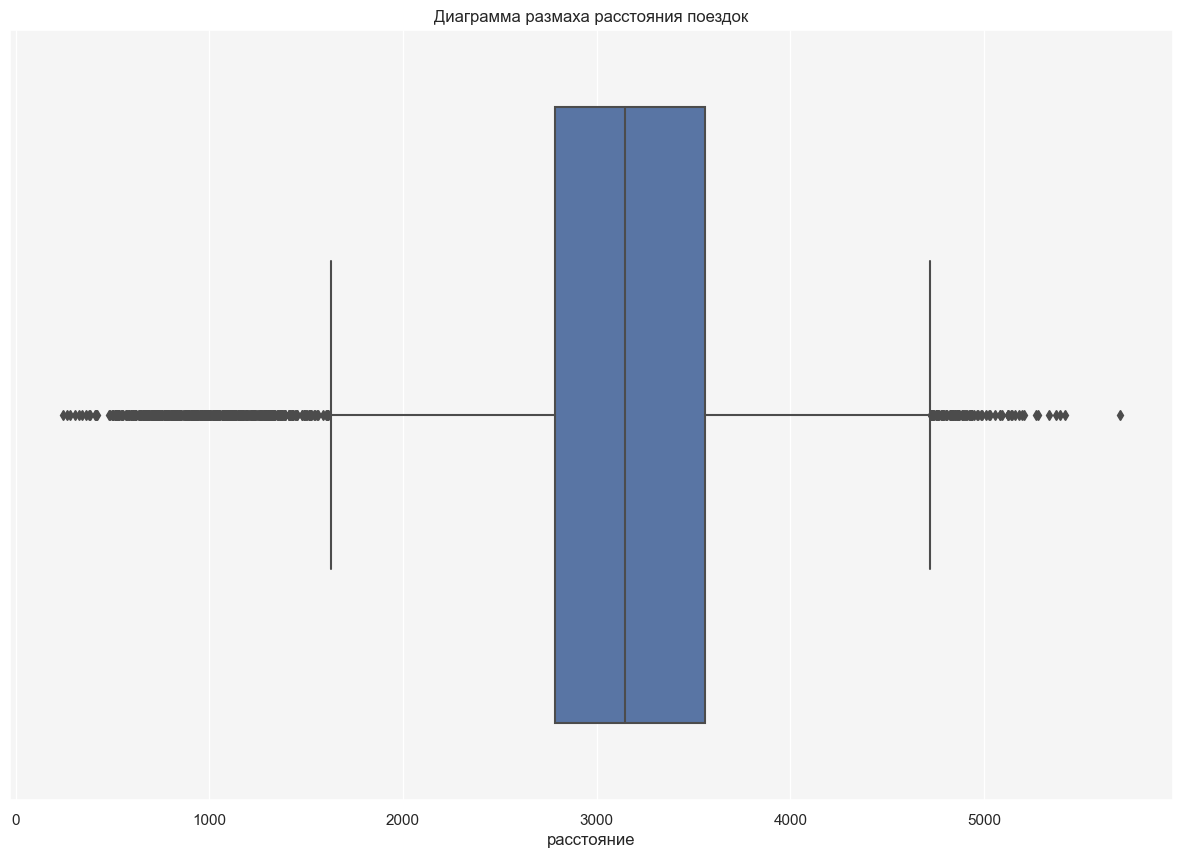

In [79]:
sns.boxplot(data=subscription_ultra, x='distance')
plt.xlabel('расстояние')
plt.title('Диаграмма размаха расстояния поездок')

* короткие поездки

Text(0.5, 1.0, 'Частота коротких поездок пользователей с подпиской в зависимости от расстоянию')

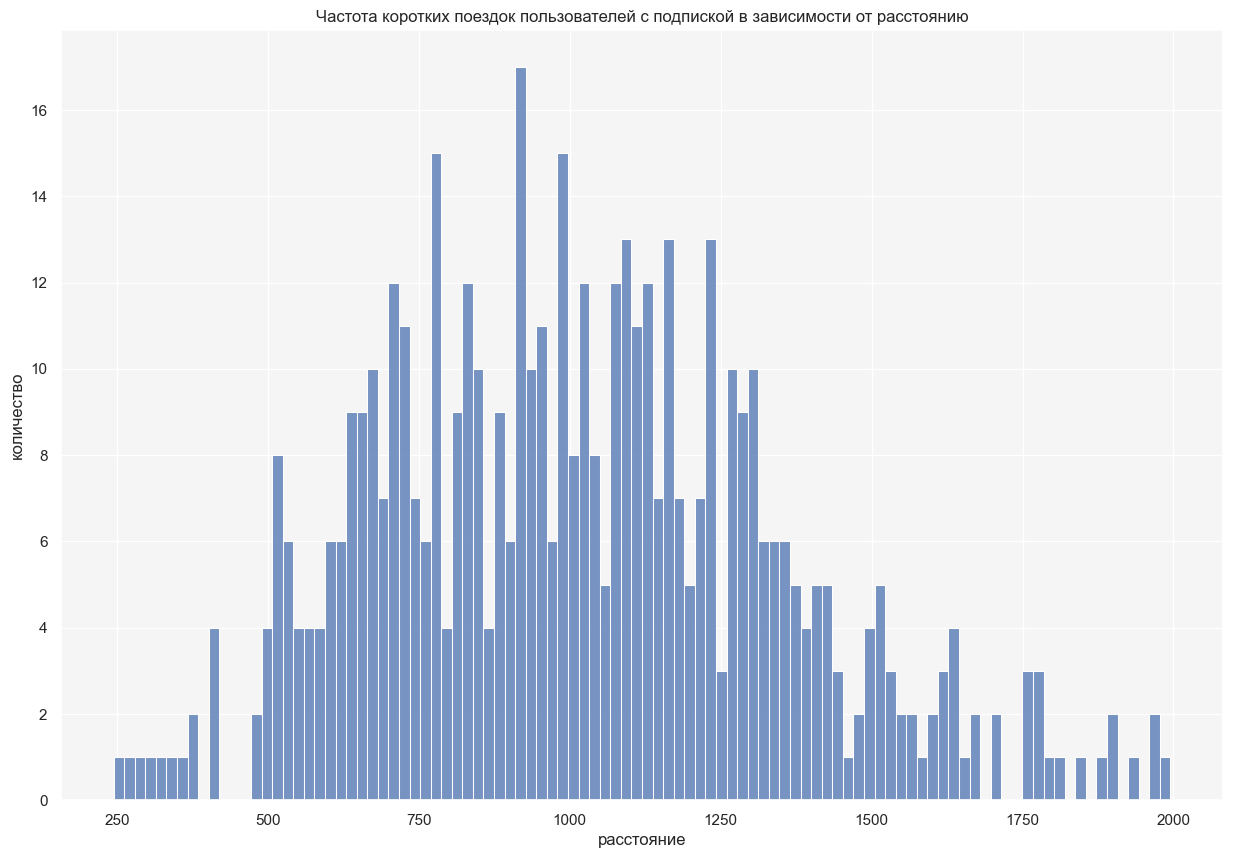

In [80]:
sns.histplot(data=subscription_ultra.query('distance_group == "короткая"'), x='distance', bins=100)
plt.xlabel('расстояние')
plt.ylabel('количество')
plt.title('Частота коротких поездок пользователей с подпиской в зависимости от расстоянию')

* средние поездки

Text(0.5, 1.0, 'Частота средних поездок пользователей с подпиской в зависимости от расстоянию')

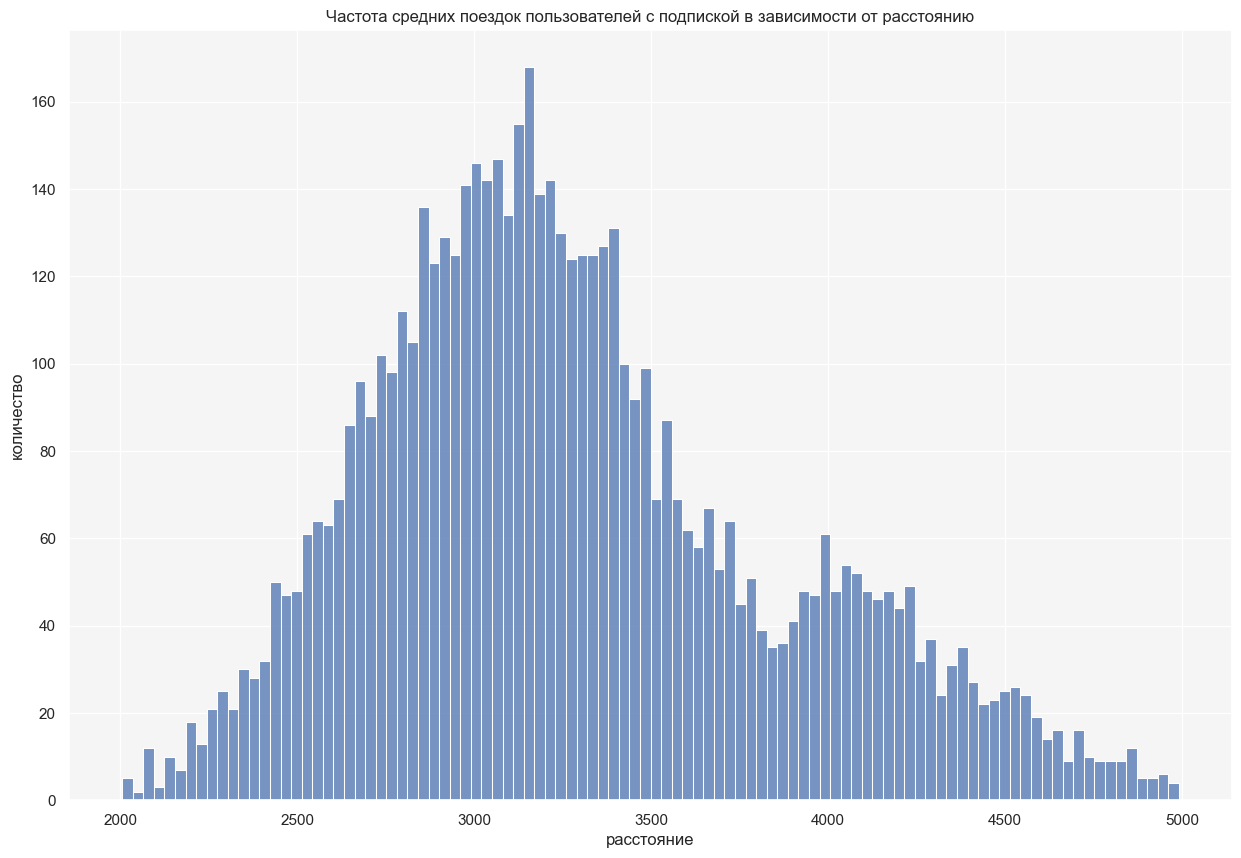

In [81]:
sns.histplot(data=subscription_ultra.query('distance_group == "средняя"'), x='distance', bins=100)
plt.xlabel('расстояние')
plt.ylabel('количество')
plt.title('Частота средних поездок пользователей с подпиской в зависимости от расстоянию')

* длинные поездки

Text(0.5, 1.0, 'Частота длинных поездок пользователей с подпиской в зависимости от расстоянию')

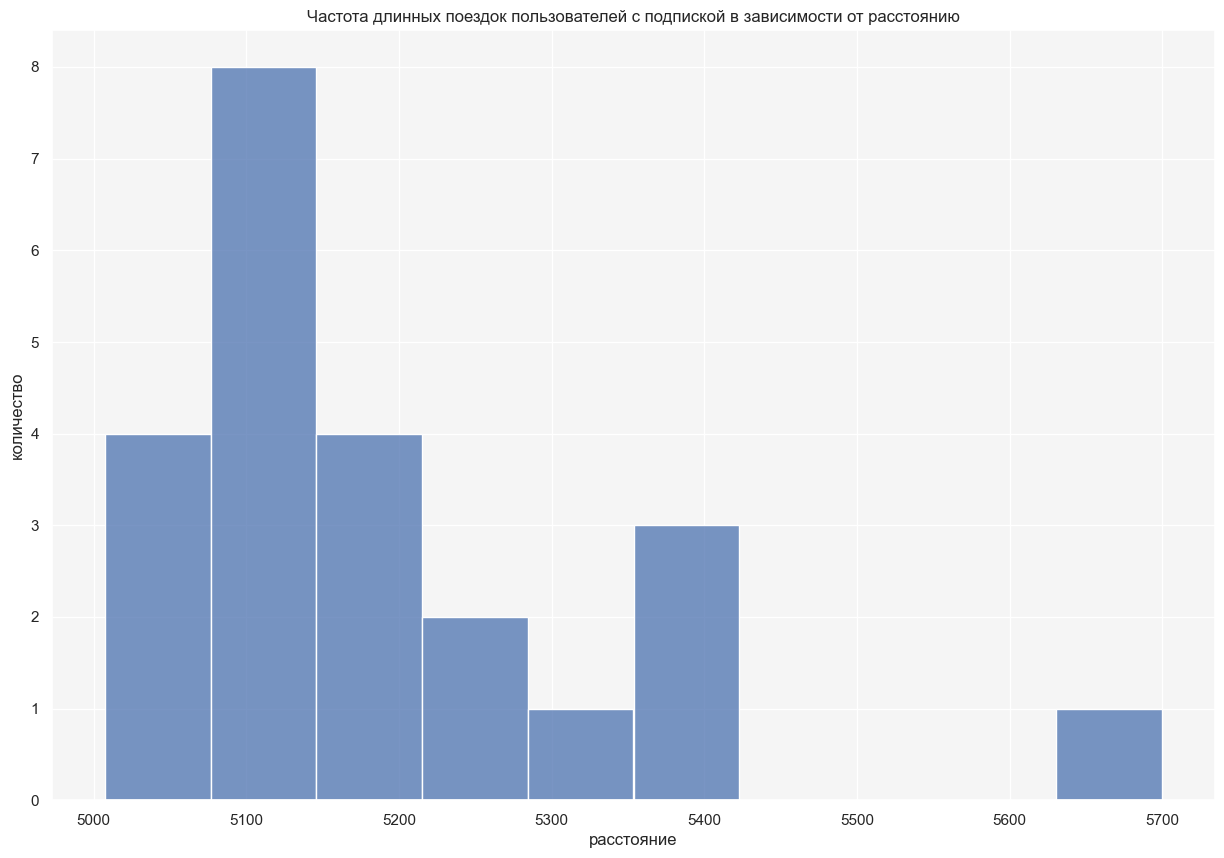

In [82]:
sns.histplot(data=subscription_ultra.query('distance_group == "длинная"'), x='distance', bins=10)
plt.xlabel('расстояние')
plt.ylabel('количество')
plt.title('Частота длинных поездок пользователей с подпиской в зависимости от расстоянию')

#### Вывод
Пользователи с подпиской чаще предпочитают средние поездки длинной  2.8 - 3.5 км

##### Время поездок

* __Пользователи без подписки__

Text(0.5, 1.0, 'Количество поездок пользователей без подписки в зависимости от продолжительности')

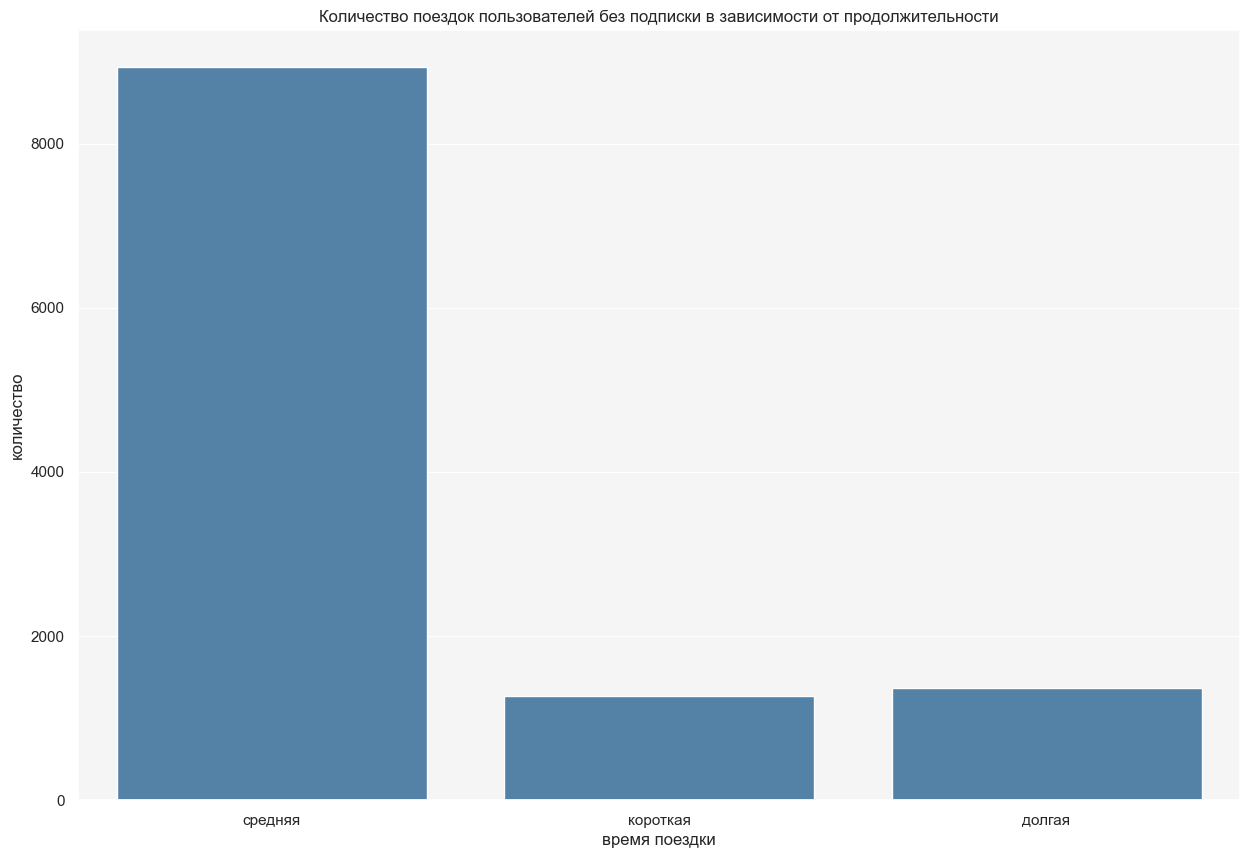

In [83]:
sns.countplot(data=subscription_free, x='duration_group', color='#4682B4')
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Количество поездок пользователей без подписки в зависимости от продолжительности')

Text(0.5, 1.0, 'Частота поездок пользователей без подписки в зависимости от времени')

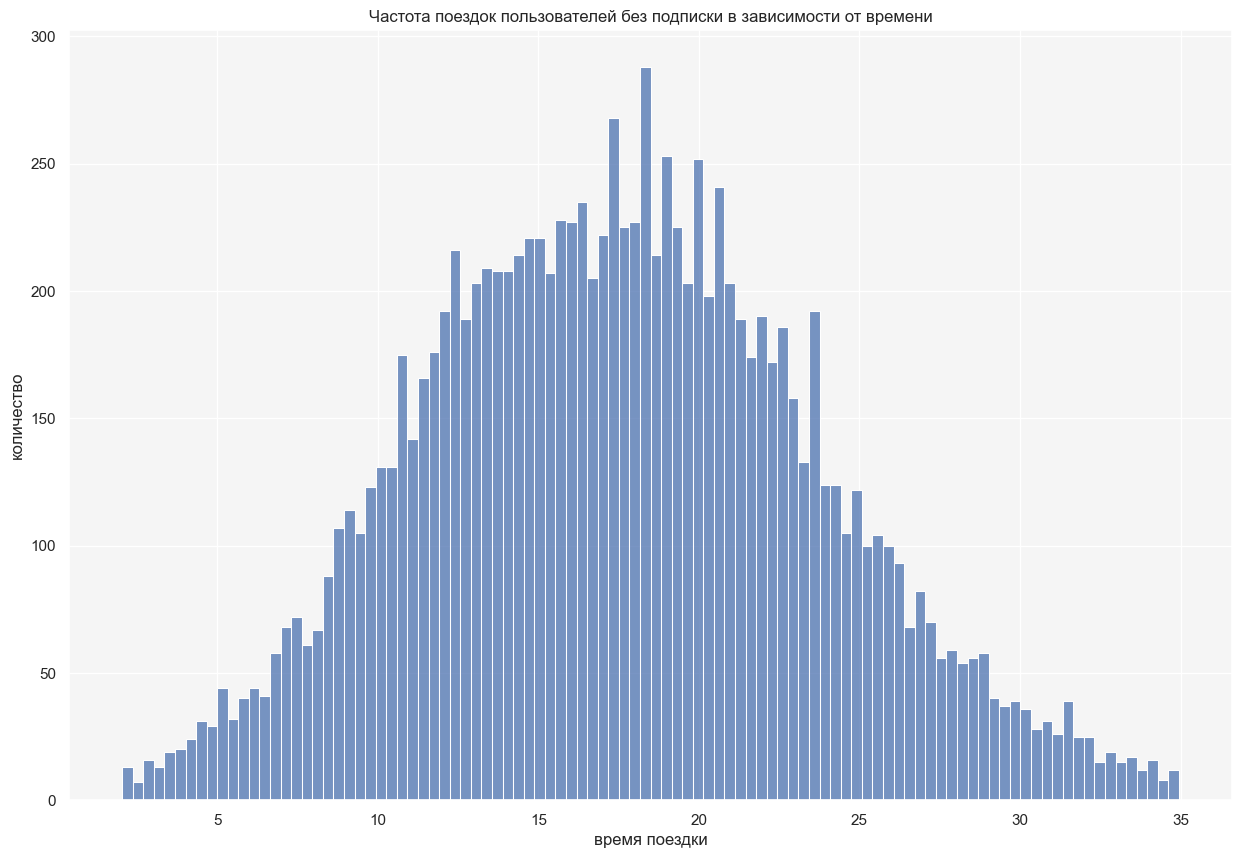

In [84]:
sns.histplot(data=subscription_free, x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота поездок пользователей без подписки в зависимости от времени')

Text(0.5, 1.0, 'Диаграмма размаха времени поездок')

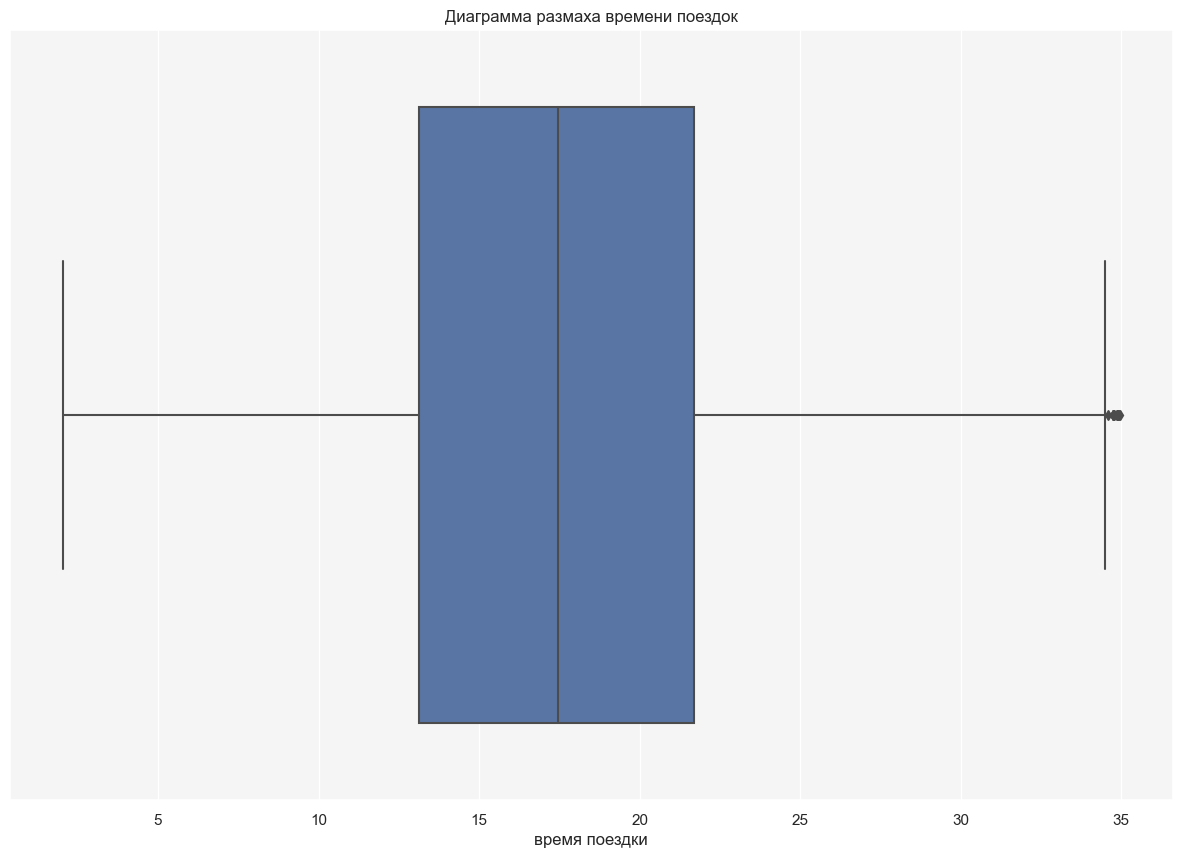

In [92]:
sns.boxplot(data=subscription_free, x='duration')
plt.xlabel('время поездки')
plt.title('Диаграмма размаха времени поездок')

* короткие поездки

Text(0.5, 1.0, 'Частота коротких поездок по времени')

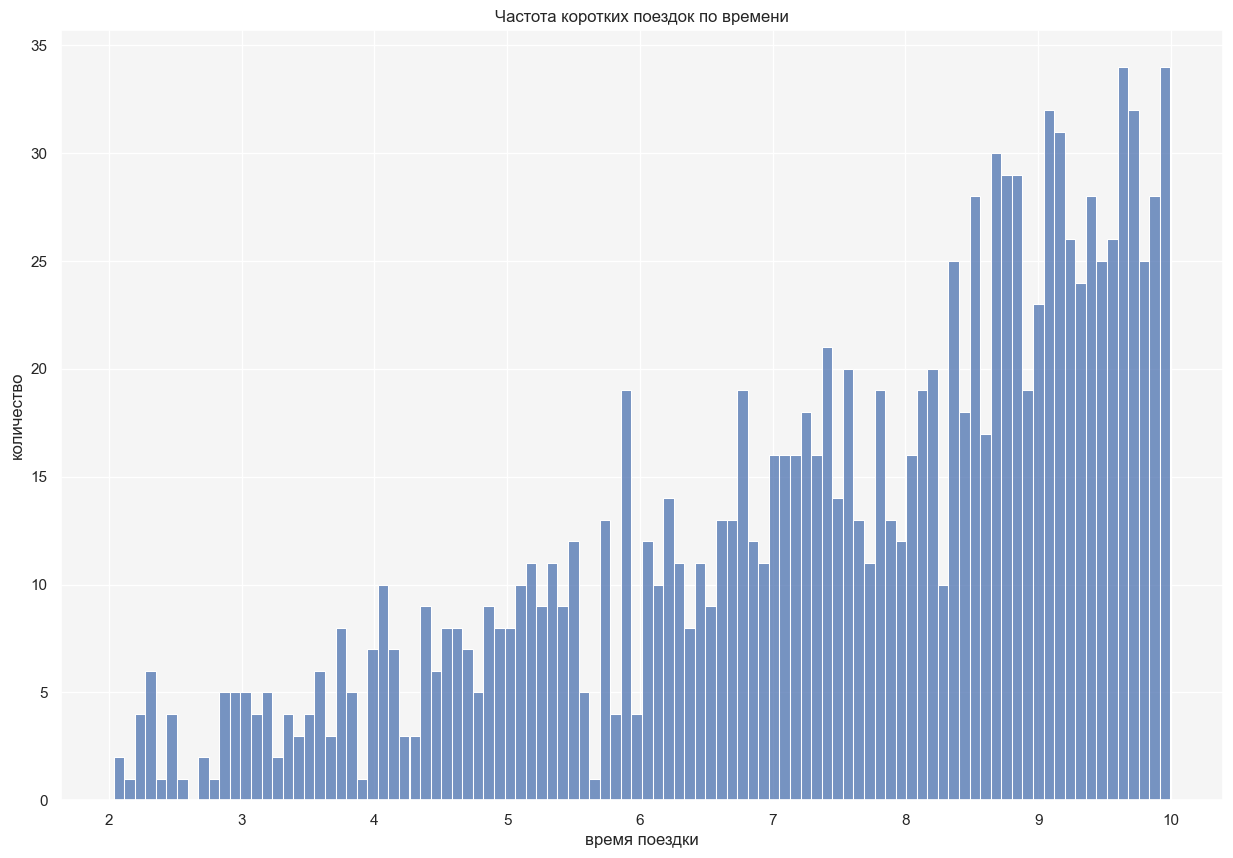

In [97]:
sns.histplot(data=subscription_free.query('duration_group == "короткая"'), x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота коротких поездок по времени')

* средние поездки

Text(0.5, 1.0, 'Частота средних поездок по времени')

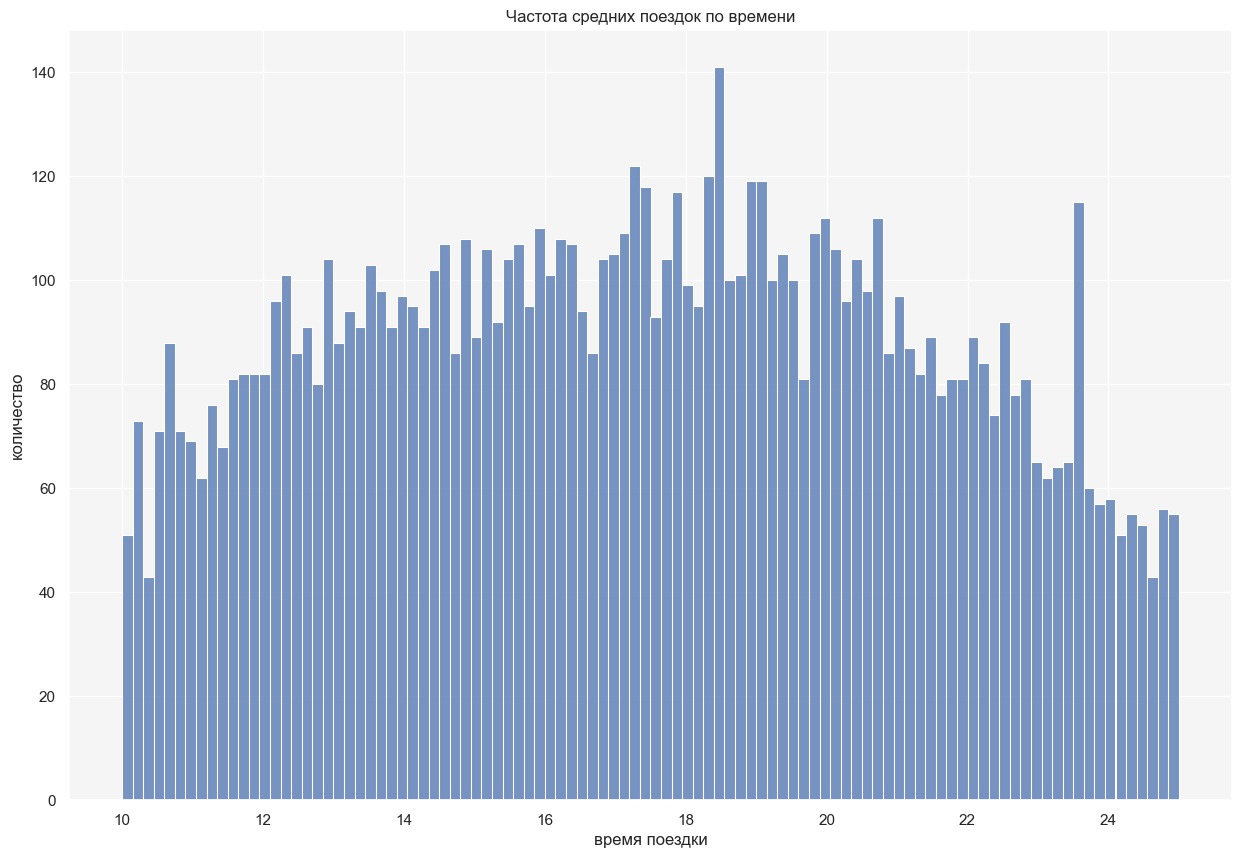

In [99]:
sns.histplot(data=subscription_free.query('duration_group == "средняя"'), x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота средних поездок по времени')

* долгие поездки

Text(0.5, 1.0, 'Частота долгих поездок по времени')

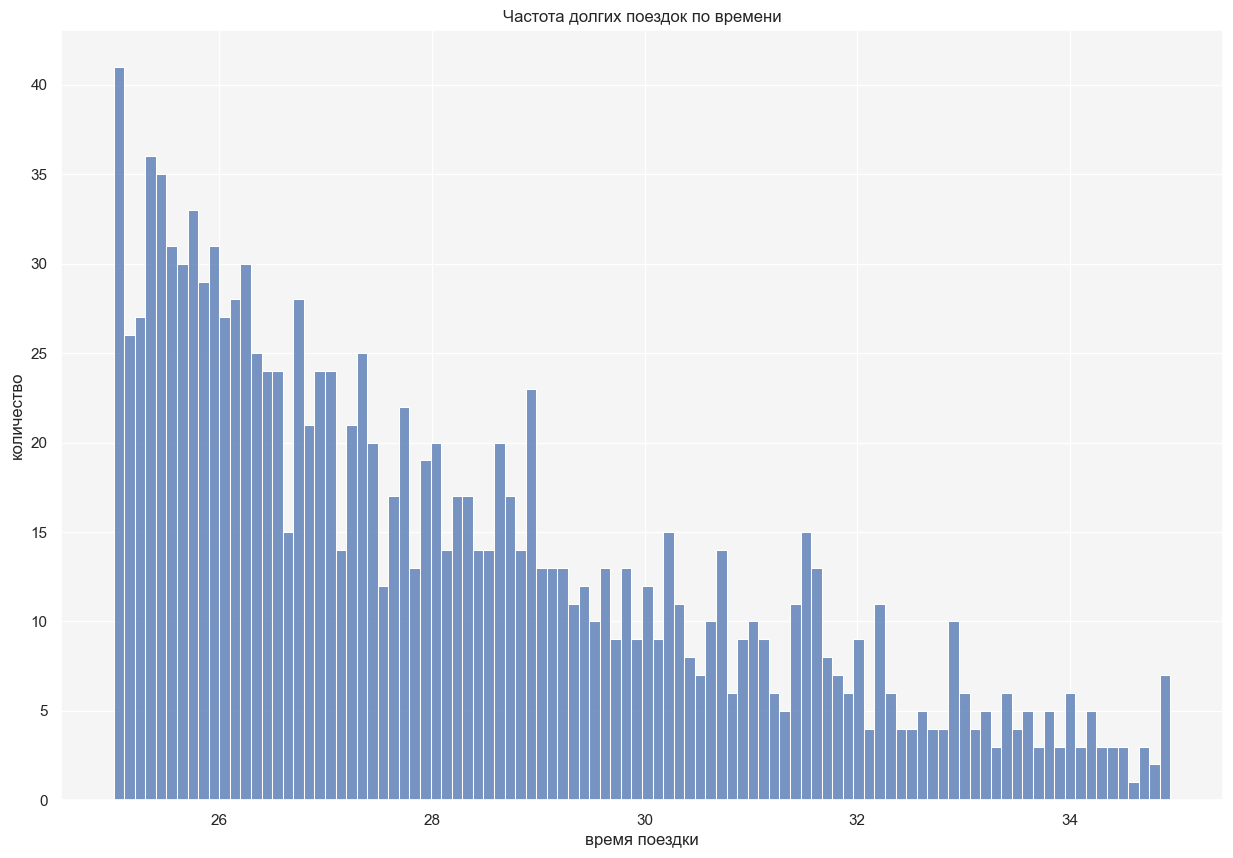

In [100]:
sns.histplot(data=subscription_free.query('duration_group == "долгая"'), x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота долгих поездок по времени')

#### Вывод
Наиболее часто встречающимся временем поездок является интервал 13-22 минуты 

* __Пользователи с подпиской__

In [104]:
subscription_ultra.groupby('duration_group')['user_id'].count().sort_values(ascending=False).index

Index(['средняя', 'долгая', 'короткая'], dtype='object', name='duration_group')

Text(0.5, 1.0, 'Количество поездок пользователей без подписки в зависимости от продолжительности')

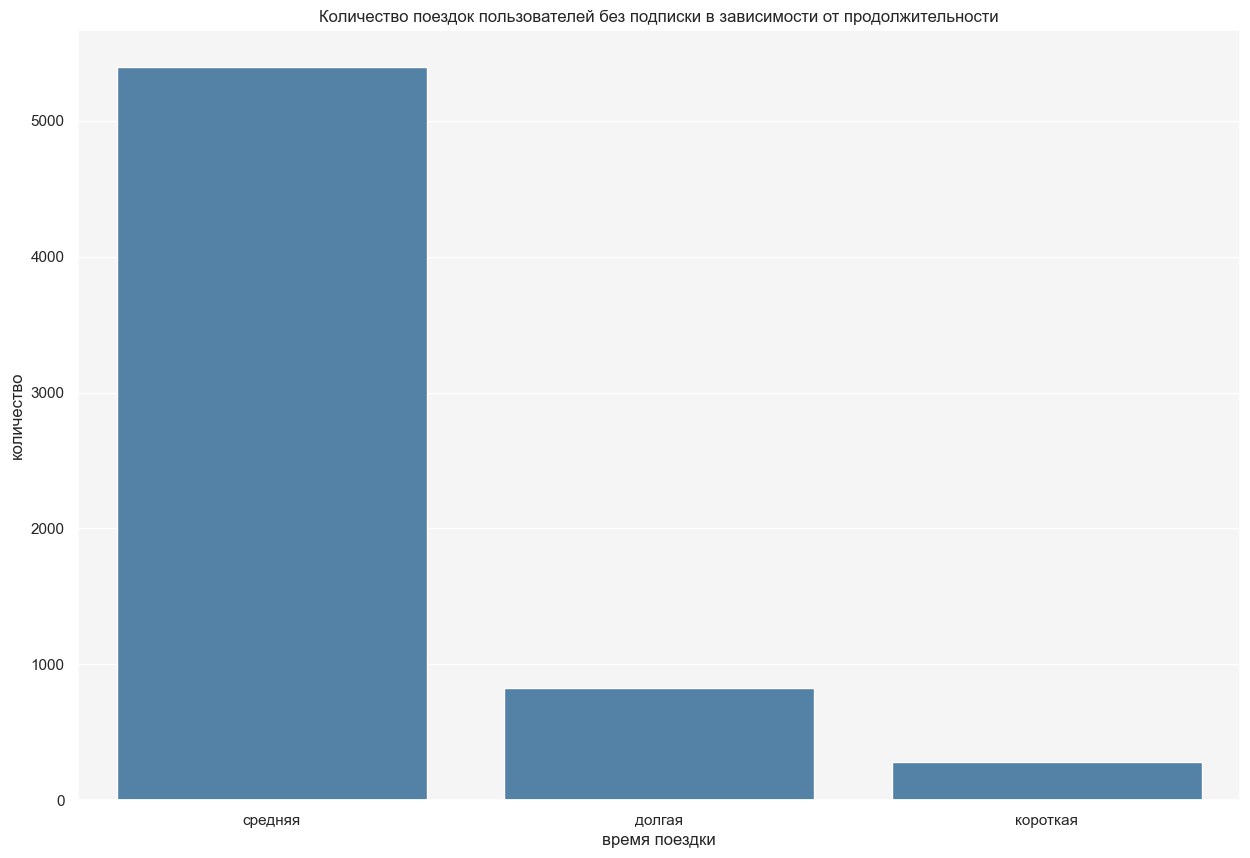

In [107]:
sns.countplot(data=subscription_ultra, x='duration_group', color='#4682B4',
              order=subscription_ultra.groupby('duration_group')['user_id']
                                      .count().sort_values(ascending=False).index)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Количество поездок пользователей без подписки в зависимости от продолжительности')

Text(0.5, 1.0, 'Количество пользователей по времени поездки')

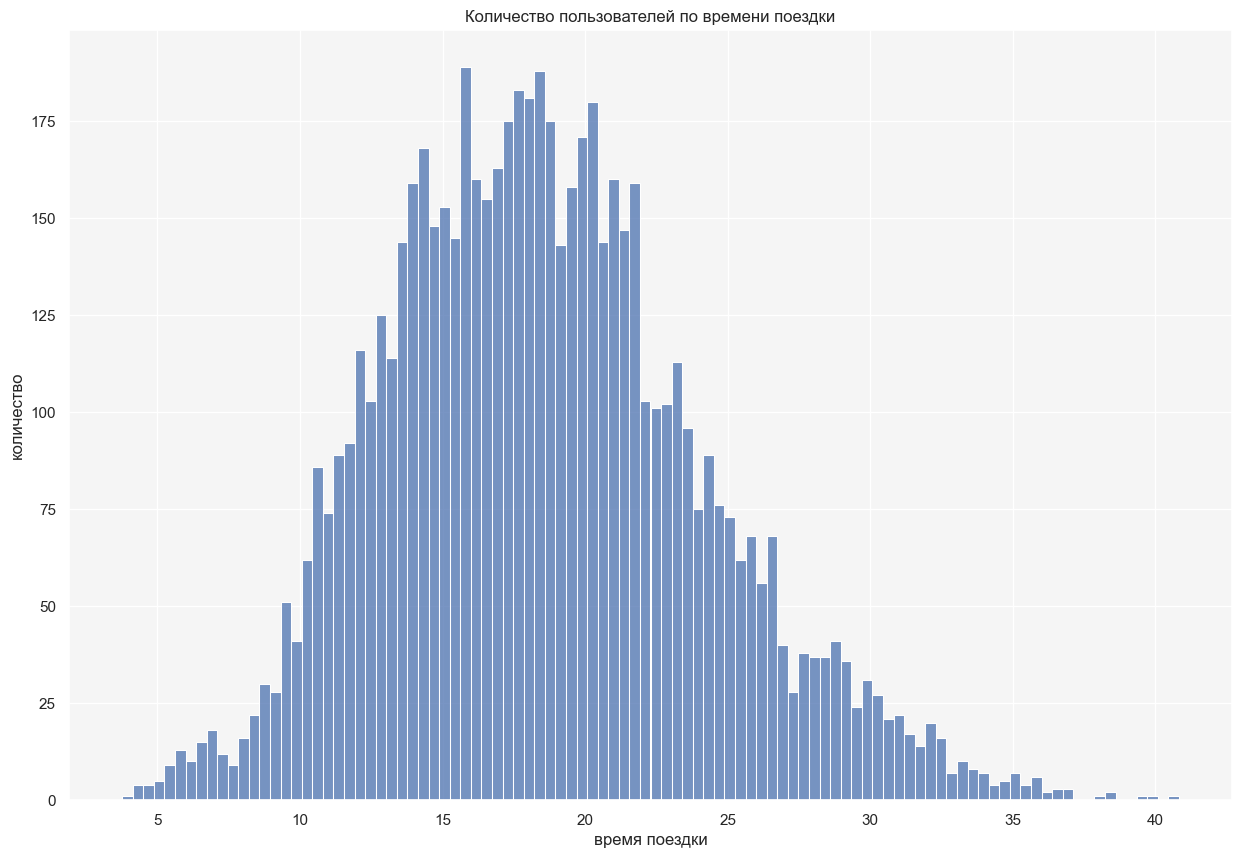

In [108]:
sns.histplot(data=subscription_ultra, x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Количество пользователей по времени поездки')

Text(0.5, 1.0, 'Диаграмма размаха времени поездок')

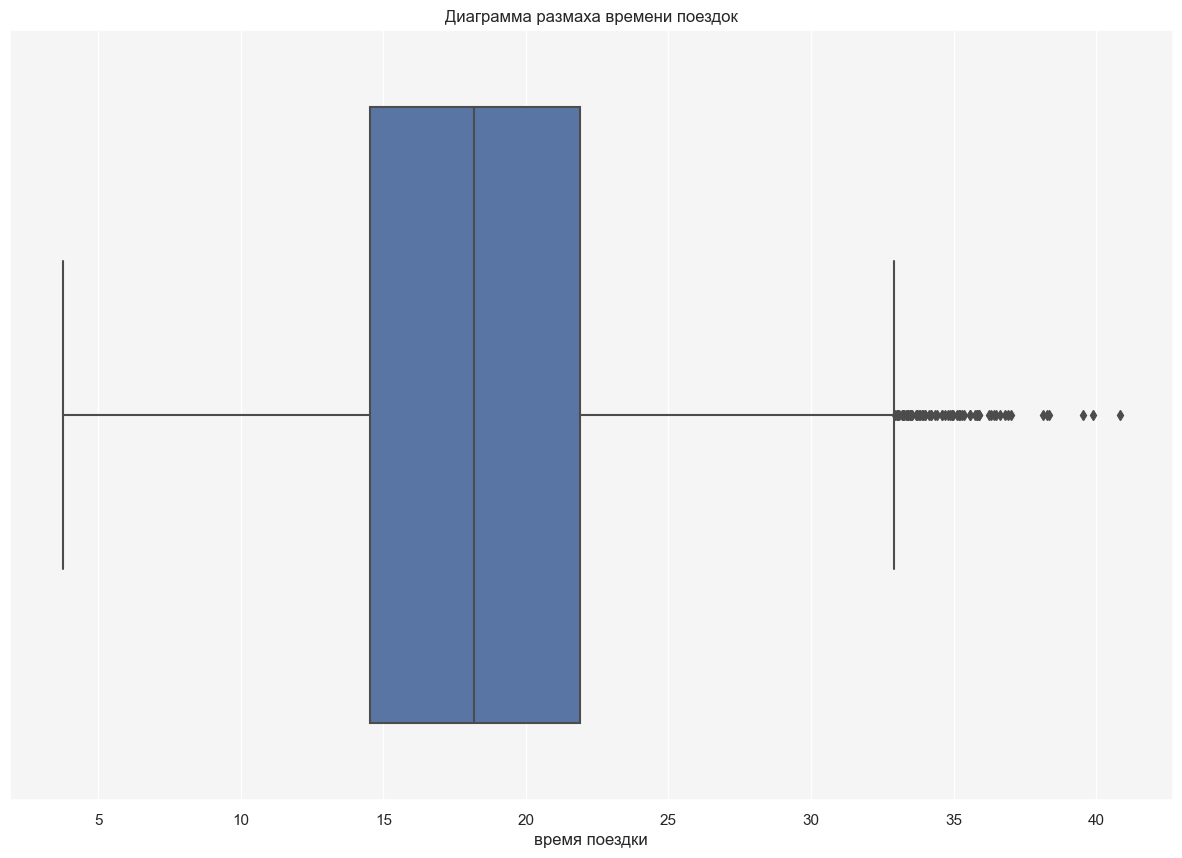

In [110]:
sns.boxplot(data=subscription_ultra, x='duration')
plt.xlabel('время поездки')
plt.title('Диаграмма размаха времени поездок')

* короткие поездки

Text(0.5, 1.0, 'Частота коротких поездок по времени')

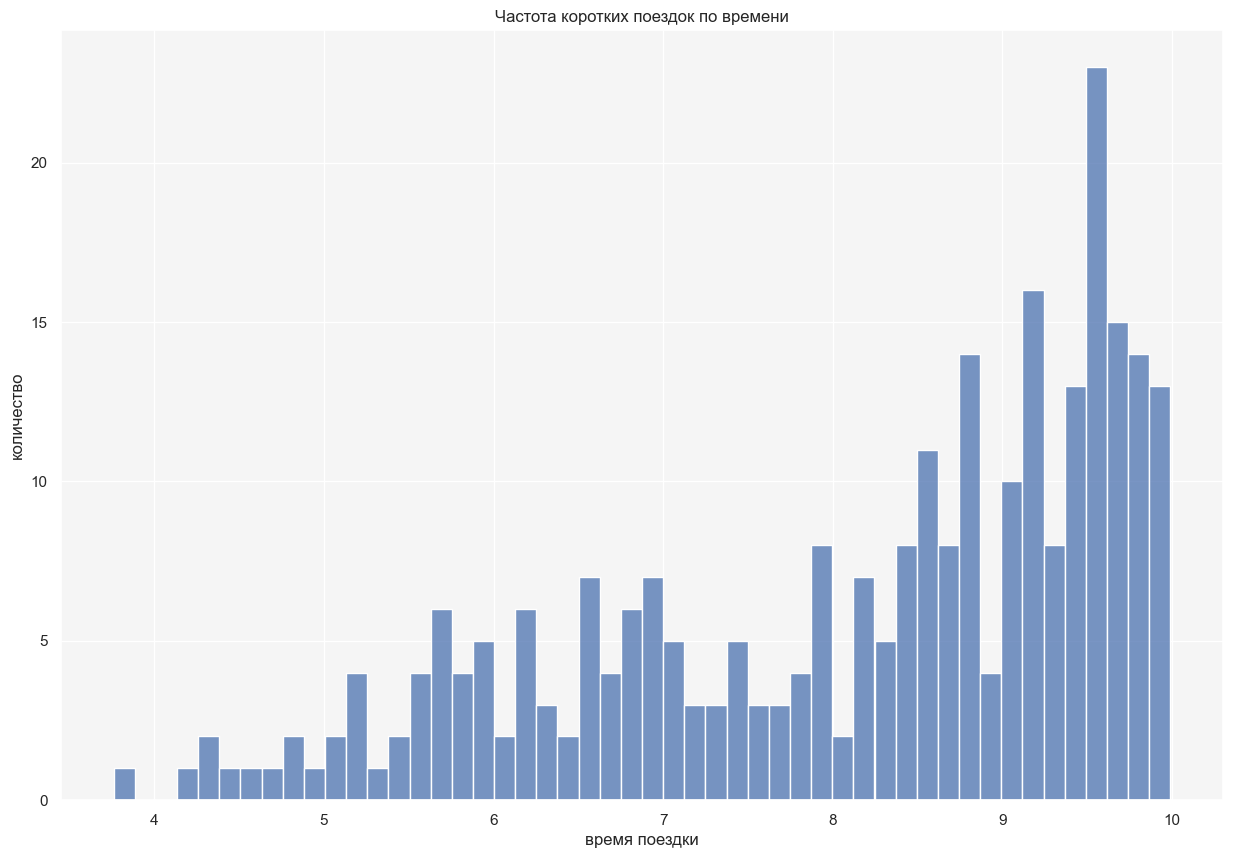

In [112]:
sns.histplot(data=subscription_ultra.query('duration_group == "короткая"'), x='duration', bins=50)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота коротких поездок по времени')

* средние поездки

Text(0.5, 1.0, 'Частота средних поездок по времени')

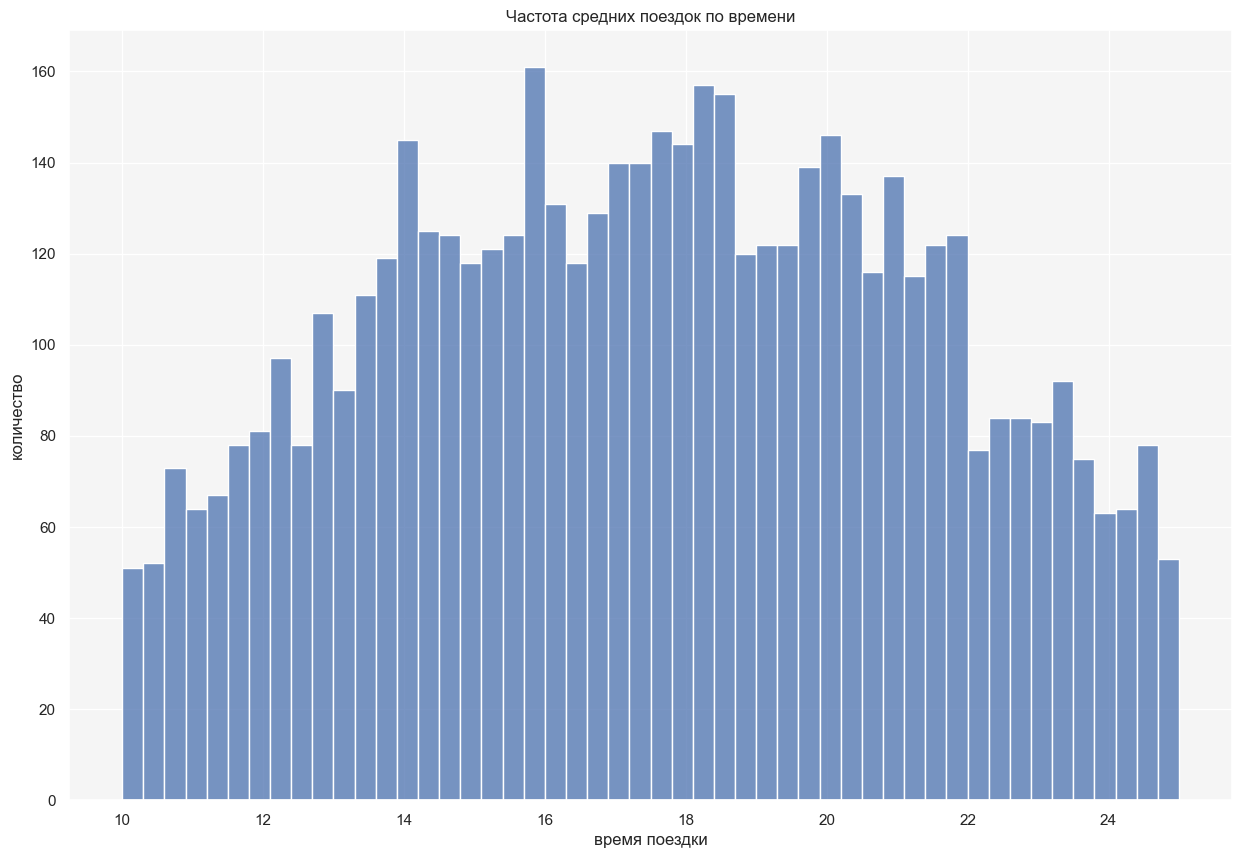

In [113]:
sns.histplot(data=subscription_ultra.query('duration_group == "средняя"'), x='duration', bins=50)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота средних поездок по времени')

* долгие поездки

Text(0.5, 1.0, 'Частота долгих поездок по времени')

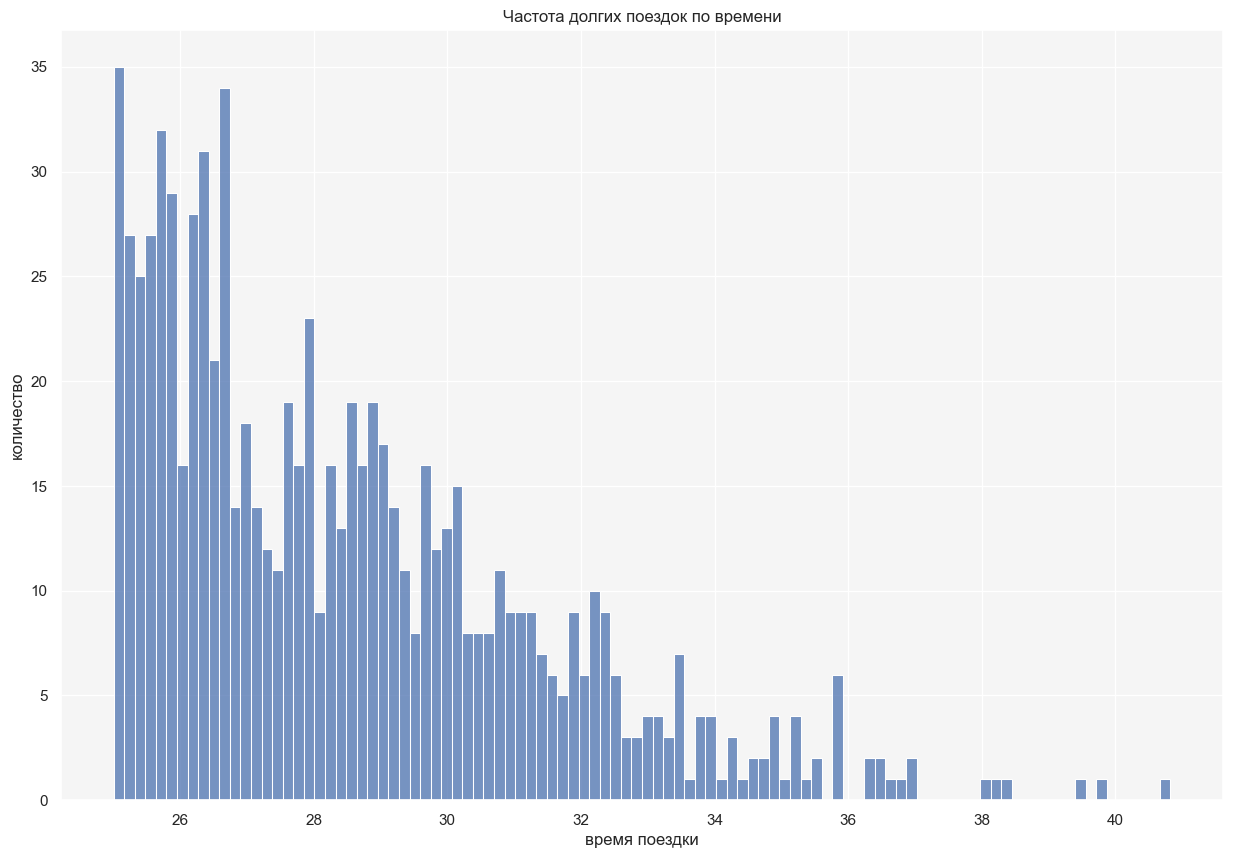

In [115]:
sns.histplot(data=subscription_ultra.query('duration_group == "долгая"'), x='duration', bins=100)
plt.xlabel('время поездки')
plt.ylabel('количество')
plt.title('Частота долгих поездок по времени')

#### Вывод
Наиболее часто встречающимся временем поездок является интервал 15-22 минуты 

## Шаг 5. Подсчёт выручки

### 5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [97]:
data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
age_group            0
distance             0
distance_group       0
duration             0
duration_group       0
date                 0
month                0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [98]:
data.query('minute_price > 8')

,user_id,name,age,city,age_group,distance,distance_group,duration,duration_group,date,month,subscription_type,minute_price,start_ride_price,subscription_fee


In [99]:
data['duration'] = np.ceil(data['duration'])

In [100]:
agr_dist_dur = data.groupby(['user_id', 'month', 'subscription_type']).agg({'distance':['sum', 'count'],
                                                       'duration':'sum', 'minute_price':'first', 
                                                      'start_ride_price':'first', 'subscription_fee':'first'})

<div class="alert alert-block alert-danger">✍
    

__Комментарий от ревьюера №2__

Перед `агрегацией`, нужно округлить время **каждой поездки** в большую сторону до минуты.

<div class="alert alert-info"> <b>Комментарии студента:</b> Исправлено </div>

### 5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [101]:
agr_dist_dur.sample(10)

distance       duration minute_price  \
                                     sum count      sum        first   
user_id month subscription_type                                        
1258    5     free               7347.55     2    52.00            8   
1315    7     free               9302.58     3    50.00            8   
928     6     free               4857.41     1    19.00            8   
1449    9     free               8545.08     2    48.00            8   
1283    6     free              13126.96     4    76.00            8   
436     3     ultra              2449.36     1    14.00            6   
1049    12    free               9891.89     3    74.00            8   
244     3     ultra             13737.03     4    97.00            6   
1416    6     free               2647.29     1    18.00            8   
276     2     ultra              3663.08     1    23.00            6   

                                start_ride_price subscription_fee  
                                           first            first  
user_id month subscription_type                                    
1258    5     free                            50                0  
1315    7     free                            50                0  
928     6     free                            50                0  
1449    9     free                            50                0  
1283    6     free                            50                0  
436     3     ultra                            0              199  
1049    12    free                            50                0  
244     3     ultra                            0              199  
1416    6     free                            50                0  
276     2     ultra                            0              199

In [102]:
agr_dist_dur.columns=['distance_sum', 'distance_count', 'duration_sum', 'minute_price_sum', 'start_ride_price', 'subscription_fee']

In [103]:
agr_dist_dur['monthly_income'] = (agr_dist_dur['start_ride_price']*agr_dist_dur['distance_count']) + \
    (agr_dist_dur['minute_price_sum']*agr_dist_dur['duration_sum']) + agr_dist_dur['subscription_fee']

In [104]:
agr_dist_dur

distance_sum  distance_count  duration_sum  \
user_id month subscription_type                                               
1       1     ultra                   7027.51               2         42.00   
        4     ultra                    754.16               1          7.00   
        8     ultra                   6723.47               2         46.00   
        10    ultra                   5809.91               2         32.00   
        11    ultra                   7003.50               3         56.00   
...                                       ...             ...           ...   
1534    6     free                    3409.47               2         26.00   
        8     free                    7622.45               2         48.00   
        9     free                    4928.17               1         23.00   
        11    free                   13350.02               4         78.00   
        12    free                    2371.71               1         16.00   

                                 minute_price_sum  start_ride_price  \
user_id month subscription_type                                       
1       1     ultra                             6                 0   
        4     ultra                             6                 0   
        8     ultra                             6                 0   
        10    ultra                             6                 0   
        11    ultra                             6                 0   
...                                           ...               ...   
1534    6     free                              8                50   
        8     free                              8                50   
        9     free                              8                50   
        11    free                              8                50   
        12    free                              8                50   

                                 subscription_fee  monthly_income  
user_id month subscription_type                                    
1       1     ultra                           199          451.00  
        4     ultra                           199          241.00  
        8     ultra                           199          475.00  
        10    ultra                           199          391.00  
        11    ultra                           199          535.00  
...                                           ...             ...  
1534    6     free                              0          308.00  
        8     free                              0          484.00  
        9     free                              0          234.00  
        11    free                              0          824.00  
        12    free                              0          178.00  

[11331 rows x 7 columns]

In [105]:
agr_dist_dur.query('start_ride_price > 50')

,,,distance_sum,distance_count,duration_sum,minute_price_sum,start_ride_price,subscription_fee,monthly_income
user_id,month,subscription_type,,,,,,,


## Шаг 6. Проверка гипотез

### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0:
Пользователи с подпиской тратят столько же времени, сколько пользователи без подписки


H1:
Пользователи с подпиской тратят больше времени, чем пользователи без подписки

In [107]:
data.query('subscription_type == "ultra"')['duration'].sample(350)

2590   18.00
4212   22.00
3837   17.00
3704   17.00
877    22.00
        ... 
4435   19.00
6203   19.00
6140   24.00
4120   30.00
4068   21.00
Name: duration, Length: 350, dtype: float64

In [108]:
alpha = 0.05
result_1 = st.ttest_ind(data.query('subscription_type == "ultra"')['duration'], 
                        data.query('subscription_type == "free"')['duration'], alternative='greater')

if result_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_1.pvalue)

Отвергаем нулевую гипотезу
p-значение 1.9615594566349812e-26


#### Вывод
На основе проведённого статистического теста, отвергаем нулевую гипотезу в пользу альтернативной

### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

H0:
Пользователи с подпиской в среднем проезжают 3130 метров


H1:
Пользователи с подпиской в среднем проезжают более 3130 метров

In [109]:
interest_distance = 3130
result_2 = st.ttest_1samp(data.query('subscription_type == "ultra"')['distance'], interest_distance, alternative='greater')

if result_2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_2.pvalue)

Не получилось отвергнуть нулевую гипотезу
p-значение 0.9195368847849785


#### Вывод
На основе проведённого статистического тесте отвергнуть гипотезу о том что средняя поездка равно 3130 м не можем

### 6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H0:
Пользователи с подпиской в среднем приносят выручки столько же, сколько и подписчики без подписки


H1:
Пользователи с подпиской в среднем приносят больше выручки, чем подписчики без подписки

In [110]:
result_3 = st.ttest_ind(agr_dist_dur.query('subscription_type == "ultra"')['monthly_income'], 
                        agr_dist_dur.query('subscription_type == "free"')['monthly_income'], alternative='greater')

if result_3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
print('p-значение', result_3.pvalue)

Отвергаем нулевую гипотезу
p-значение 1.7037663013012366e-27


#### Вывод
Отвергаем нулевую гипотезу в пользу альтернативной

### 6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

### Общий вывод
В ходе исследования я выяснил, что больше всего пользователей сервиса находятся в Пятигорске. Сервис имеет популярность среди людей 18-30 лет. 54% пользователей имеют платную подписку. Среди пользователей распространены поездки на средние расстояния 2-5 км и поездки наиболее часто занимают 15-25 мин, это равносильно относится как к пользователям с подпиской, так и без. 

Так же я проверил несколько гипотез.

1. Тратят ли пользователи с подпиской больше времени на поездки.
Есть основания предполагать, что эта гипотеза верна
2. Среднее расстояние одной поездки среди пользователей с подпиской превышает 3130.
Не удалось подтвердить эту гипотезу
3. Средняя помесячная выручка от пользователей с подпиской  больше чем от пользователей без подписки.
Есть основания предполагать, что эта гипотеза правдива

На основе проведённых статитстических тестов, можно предположить, что пользователи с подпиской приносят больше месячный доход, чем пользователи без подписки. В связи с этим имеет смысл различными способами стимулировать пользователей без подписки приобретать платную подписку.

На основе остальных гипотез, не очень понятно какие рекомандации я должен дать. Рекомендации будут зависеть от того, что бизнесу нужно. Если бизнесу необходимо, чтобы самокаты проезжали в среднем 3130 м за поездку, для того чтобы сохранить самокаты и сократить расходы на их обслуживание, то могу сказать, что опровергнуть гипотезу о том, что за одну поездку пользователи с подпиской проезжают в среднем 3130 м, не получилось и как то стимулировать пользователей сокращать свои поездки не нужно. Это касается и времени поездки пользователей с подпиской, какие рекомендации я могу дать, если не поставлена задача?